!pip install pandas, !pip install openpyxl, !pip install adjustText, !pip install statsmodels, pip install seaborn, !pip install linearmodels
!pip install python-docx
!pip install linearmodels --upgrade
!pip install arch --upgrade

# 1. IMPORT Data

In [1]:
import pandas as pd

# Load Excel file into a DataFrame
file_path = "./Original_Data/2018-v272-05072025-EU MRV Publication of information.xlsx"
data_18 = pd.read_excel(file_path, header=2)

file_path = "./Original_Data/2019-v227-28052025-EU MRV Publication of information.xlsx"
data_19 = pd.read_excel(file_path, header=2)

file_path = "./Original_Data/2020-v207-23082025-EU MRV Publication of information.xlsx"
data_20 = pd.read_excel(file_path, header=2)

file_path = "./Original_Data/2021-v214-30042025-EU MRV Publication of information.xlsx"
data_21 = pd.read_excel(file_path, header=2)

file_path = "./Original_Data/2022-v238-01082025-EU MRV Publication of information.xlsx"
data_22 = pd.read_excel(file_path, header=2)

file_path = "./Original_Data/2023-v70-04092025-EU MRV Publication of information.xlsx"
data_23 = pd.read_excel(file_path, header=2)

file_path = "./Original_Data/2024-v62-06092025-EU MRV Publication of information.xlsx"
data_24 = pd.read_excel(file_path, header=2)

target_cols = [
    "Ship type","IMO Number", "Name","Reporting Period","Technical efficiency",
    "A", "B", "C", "D",
    "Total fuel consumption [m tonnes]",
    "Total CO₂ emissions [m tonnes]",
    "Annual Time spent at sea [hours]",
    
    "Annual average Fuel consumption per distance [kg / n mile]",
    "Annual average Fuel consumption per transport work (volume) [g / m³ · n miles]",
    "Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles]",
    "Annual average Fuel consumption per transport work (dwt) [g / dwt carried · n miles]",
    "Annual average Fuel consumption per transport work (freight) [g / m tonnes · n miles]",
    "Annual average Fuel consumption per transport work (pax) [g / pax · n miles]",

    "Annual average CO₂ emissions per distance [kg CO₂ / n mile]",
    "Annual average CO₂ emissions per transport work (volume) [g CO₂ / m³ · n miles]",
    "Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]",
    "Annual average CO₂ emissions per transport work (dwt) [g CO₂ / dwt carried · n miles]",
    "Annual average CO₂ emissions per transport work (freight) [g CO₂ / m tonnes · n miles]",
    "Annual average CO₂ emissions per transport work (pax) [g CO₂ / pax · n miles]",
]

# Put DataFrames in a dictionary
datasets = {
    "2018": data_18,
    "2019": data_19,
    "2020": data_20,
    "2021": data_21,
    "2022": data_22,
    "2023": data_23,
    "2024": data_24
} 

# Check columns
for year, df in datasets.items():
    missing = [col for col in target_cols if col not in df.columns]
    print(f"\nYear {year}:")
    if not missing:
        print("✅ All target columns are present.")
    else:
        print("⚠️ Missing columns:")
        for col in missing:
            print("   -", col)
#------------------------------------------#

C:\Users\30697\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\30697\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\30697\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\30697\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl'


Year 2018:
✅ All target columns are present.

Year 2019:
✅ All target columns are present.

Year 2020:
✅ All target columns are present.

Year 2021:
✅ All target columns are present.

Year 2022:
✅ All target columns are present.

Year 2023:
✅ All target columns are present.

Year 2024:
✅ All target columns are present.


### 1.1 Creation of a Merged Data Matrix and Basic Proccessing

In [2]:
import numpy as np

#Creation of one merged data frame
data = pd.concat([data_18, data_19, data_20, data_21, data_22, data_23, data_24], 
                   ignore_index=True, sort=False)[target_cols]
data = data.sort_values(by="Reporting Period")

# Safely convert to numeric, keep NaN if conversion fails
cols_to_convert = [
    "Annual average Fuel consumption per distance [kg / n mile]",
    "Annual average Fuel consumption per transport work (volume) [g / m³ · n miles]",
    "Annual average Fuel consumption per transport work (mass) [g / m tonnes · n miles]",
    "Annual average Fuel consumption per transport work (dwt) [g / dwt carried · n miles]",
    "Annual average Fuel consumption per transport work (freight) [g / m tonnes · n miles]",
    "Annual average Fuel consumption per transport work (pax) [g / pax · n miles]",

    "Annual average CO₂ emissions per distance [kg CO₂ / n mile]",
    "Annual average CO₂ emissions per transport work (volume) [g CO₂ / m³ · n miles]",
    "Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]",
    "Annual average CO₂ emissions per transport work (dwt) [g CO₂ / dwt carried · n miles]",
    "Annual average CO₂ emissions per transport work (freight) [g CO₂ / m tonnes · n miles]",
    "Annual average CO₂ emissions per transport work (pax) [g CO₂ / pax · n miles]",
]

for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors="coerce")
#----------------------------------------------------------------------------------#


#Creation of Total Distance Covered column and Average Annual Speed Column
data["Annual Distance per Vessel [n miles]"] = (data["Total fuel consumption [m tonnes]"] / data["Annual average Fuel consumption per distance [kg / n mile]"])*1000
data["Annual Distance per Vessel [n miles]"] = data["Annual Distance per Vessel [n miles]"].replace([np.inf, -np.inf], np.nan)

data["Annual Average Speed per Vessel [knots]"] = data["Annual Distance per Vessel [n miles]"] / data["Annual Time spent at sea [hours]"]
data["Annual Average Speed per Vessel [knots]"] = data["Annual Average Speed per Vessel [knots]"].replace([np.inf, -np.inf], np.nan)
#-----------------------------------------------------------------------------------#

#Break "Technical Efficiency" to two columns -> Index + Value
def split_tech_eff(val):
    if isinstance(val, str) and "(" in val and ")" in val:
        index = val.split("(")[0].strip()                      # e.g. "EIV"
        number = val.split("(")[1].split()[0]                  # e.g. "15.95"
        try:
            number = float(number)
        except:
            number = np.nan
        return index, number
    else:
        return np.nan, np.nan #because we want to be treated as floats

# Apply row by row
data["Technical efficiency Index"], data["Technical efficiency Index Value [gCO₂/t·nm]"] = zip(
    *data["Technical efficiency"].apply(split_tech_eff)
)
#--------------------------------------------------------------------------------------#

#----------------MERGE PASSENGER SHIPS WITH CRUISE SHIPS & Offshore with other ship types -------------------------------#
data["Ship type"] = data["Ship type"].replace("Other ship types (Offshore)", "Other ship types")
data["Ship type"] = data["Ship type"].replace("Passenger ship (Cruise Passenger ship)", "Passenger ship")

# 2. CLEARING THE DATA

## 2.1 Total Vessels - Zero Imports

In [4]:
#check for double entries
duplicates = data[data.duplicated(subset=["IMO Number", "Reporting Period"], keep=False)] 
#Since there are NO double entries count the vessels
yearly_vessels = data.groupby("Reporting Period")["IMO Number"].nunique()
#count the zero consumption entries
yearly_zeros = ( data.groupby("Reporting Period")["Total fuel consumption [m tonnes]"].apply(lambda x: (x == 0).sum()) .reset_index(name="Zero Count") )

# Define the columns where zero should NOT exist
cols_to_check = [
    "Total fuel consumption [m tonnes]",
    "Total CO₂ emissions [m tonnes]",
    "Annual Time spent at sea [hours]",
    "Annual Distance per Vessel [n miles]",
]

# Keep only rows where ALL those columns are non-zero
data_no_zeros = data[(data[cols_to_check] != 0).all(axis=1)]

## 2.2 Remove Outliers (Beyond Zeros) - Filter by Ship Category

In [5]:
# ------- Per Ship Category ----------------------------------------------------------------------------------------#
def count_outliers_by_group_two_cols(df, cols, group_col="Ship type", lower=0.025, upper=0.975, return_filtered=True):
    """
    Count percentile-based outliers per group (Ship type) for two columns, 
    and optionally return filtered data (rows within both percentile ranges).

    Parameters:
        df             : pandas DataFrame
        cols           : list of two column names
        group_col      : column to group by (default "Ship type")
        lower, upper   : percentiles for outlier detection
        return_filtered: if True, return filtered DataFrame (rows within both ranges)

    Returns:
        outlier_counts : dict {column: {group: number of outliers}}
        thresholds     : dict {column: {group: (low, high)}}
        filtered_df    : DataFrame with rows within percentile ranges for both columns
    """
    outlier_counts = {col: {} for col in cols}
    thresholds = {col: {} for col in cols}
    filtered_list = []

    for group, group_df in df.groupby(group_col):
        mask = pd.Series(True, index=group_df.index)  # start with all True
        for col in cols:
            low, high = group_df[col].quantile(lower), group_df[col].quantile(upper)
            thresholds[col][group] = (low, high)

            col_mask = group_df[col].between(low, high)
            mask &= col_mask  # keep only rows within percentile for this column

            outlier_counts[col][group] = (~col_mask).sum()  # count outliers for this column

        if return_filtered:
            filtered_group = group_df[mask]
            filtered_list.append(filtered_group)

    filtered_df = pd.concat(filtered_list, ignore_index=True) if return_filtered else None

    return outlier_counts, thresholds, filtered_df
#------------------END OF FUNCTION---------------------------------------------------------------#

cols_to_filter_by = [
    "Annual average Fuel consumption per distance [kg / n mile]",
    "Annual average CO₂ emissions per distance [kg CO₂ / n mile]",
    "Annual Average Speed per Vessel [knots]",
    
]

#------------ CALL THE FUNCTION---------------------------------------------#
outlier_counts, thresholds, filtered_data = count_outliers_by_group_two_cols(
    data_no_zeros,
    cols=cols_to_filter_by,
    group_col="Ship type",
    lower=0.025,
    upper=0.975
)

# Print outlier counts per column per ship type
for col in cols_to_filter_by:
    print(f"\nOutlier counts for column: {col}")
    for ship, count in outlier_counts[col].items():
        print(f"{ship}: {count} outliers")

# Print thresholds per column per ship type
print("\nThresholds per column per ship type:")
for col in cols_to_filter_by:
    print(f"\nColumn: {col}")
    for ship, (low, high) in thresholds[col].items():
        print(f"{ship}: {low:.2f} - {high:.2f}")

print("\nFiltered data rows:", len(filtered_data))
print("\nNO zero data rows:", len(data_no_zeros))
print("\nInitial data rows:", len(data))


Outlier counts for column: Annual average Fuel consumption per distance [kg / n mile]
Bulk carrier: 1257 outliers
Chemical tanker: 477 outliers
Combination carrier: 4 outliers
Container ship: 652 outliers
Container/ro-ro cargo ship: 24 outliers
Gas carrier: 118 outliers
General cargo ship: 424 outliers
LNG carrier: 108 outliers
Oil tanker: 665 outliers
Other ship types: 72 outliers
Passenger ship: 60 outliers
Refrigerated cargo carrier: 50 outliers
Ro-pax ship: 140 outliers
Ro-ro ship: 86 outliers
Vehicle carrier: 160 outliers

Outlier counts for column: Annual average CO₂ emissions per distance [kg CO₂ / n mile]
Bulk carrier: 1257 outliers
Chemical tanker: 476 outliers
Combination carrier: 4 outliers
Container ship: 652 outliers
Container/ro-ro cargo ship: 24 outliers
Gas carrier: 118 outliers
General cargo ship: 424 outliers
LNG carrier: 108 outliers
Oil tanker: 665 outliers
Other ship types: 72 outliers
Passenger ship: 60 outliers
Refrigerated cargo carrier: 50 outliers
Ro-pax ship

In [8]:
data_no_zeros

,Ship type,IMO Number,Name,Reporting Period,Technical efficiency,A,B,C,D,Total fuel consumption [m tonnes],...,Annual average CO₂ emissions per distance [kg CO₂ / n mile],Annual average CO₂ emissions per transport work (volume) [g CO₂ / m³ · n miles],Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles],Annual average CO₂ emissions per transport work (dwt) [g CO₂ / dwt carried · n miles],Annual average CO₂ emissions per transport work (freight) [g CO₂ / m tonnes · n miles],Annual average CO₂ emissions per transport work (pax) [g CO₂ / pax · n miles],Annual Distance per Vessel [n miles],Annual Average Speed per Vessel [knots],Technical efficiency Index,Technical efficiency Index Value [gCO₂/t·nm]
0,Passenger ship,5383304,ASTORIA,2018,Not Applicable,Yes,NaN,NaN,NaN,6307.75,...,442.71,NaN,NaN,NaN,NaN,993.14,45356.654922,10.876374,NaN,NaN
1,Passenger ship,6417097,MARCO POLO,2018,Not Applicable,Yes,NaN,NaN,NaN,8125.56,...,454.65,NaN,NaN,NaN,NaN,639.96,56502.051318,12.957492,NaN,NaN
2,Ro-pax ship,6511128,RED STAR 1,2018,EIV (45.57 gCO₂/t·nm),Yes,NaN,NaN,NaN,2205.37,...,171.31,NaN,NaN,NaN,2.6,2.07,40517.545471,14.940098,EIV,45.57
3,Passenger ship,6602898,OCEAN MAJESTY,2018,EIV (31.73 gCO₂/t·nm),Yes,NaN,NaN,NaN,6151.40,...,382.91,NaN,NaN,NaN,NaN,1124.27,50867.443976,11.867698,EIV,31.73
4,Other ship types,6703343,EQUALITY,2018,Not Applicable,Yes,NaN,NaN,NaN,549.00,...,199.36,NaN,286.30,NaN,NaN,NaN,8651.118815,8.582459,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89191,Bulk carrier,9997268,ROSTRUM HAMBURG,2024,EEDI (4.04 gCO₂/t·nm),NaN,NaN,Yes,NaN,722.30,...,186.34,NaN,25.59,NaN,NaN,NaN,12190.717300,12.593716,EEDI,4.04
89192,General cargo ship,9997282,ALEXIA,2024,EEDI (8.06 gCO₂/t·nm),Yes,NaN,NaN,NaN,242.94,...,167.03,NaN,NaN,23.76,NaN,NaN,4662.955854,7.090007,EEDI,8.06
89193,Oil tanker,9997385,HAVVA ANA,2024,EEDI (11.5 gCO₂/t·nm),NaN,Yes,NaN,NaN,245.88,...,100.07,NaN,18.31,NaN,NaN,NaN,7736.941473,9.864773,EEDI,11.50
89194,Bulk carrier,9998262,UNICORN OL,2024,EIV (8.59 gCO₂/t·nm),Yes,NaN,Yes,NaN,618.48,...,113.56,NaN,NaN,NaN,NaN,NaN,17019.262521,12.119392,EIV,8.59


# 3. Basic Plots

## 3.1 Total Reports - Valid and NOT Valid

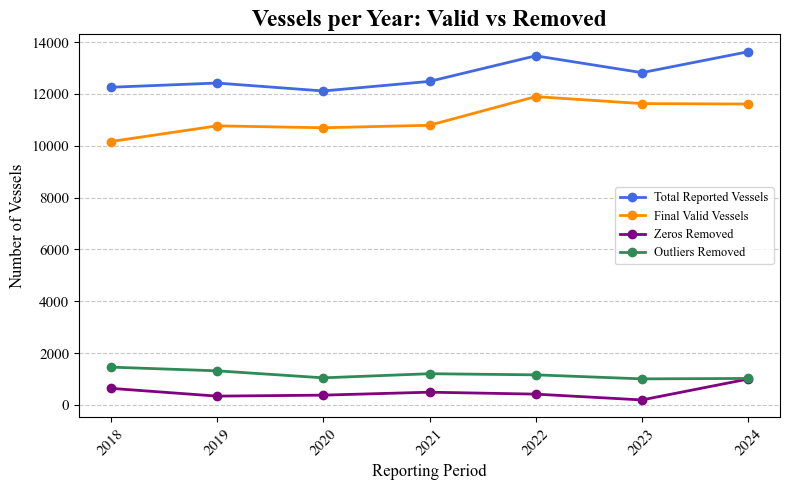

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# --- Data preparation ---
# 1. Total vessels per year (original)
yearly_vessels = data.groupby("Reporting Period")["IMO Number"].nunique()

# 2. Total vessels per year after outlier filtering
filtered_vessels = filtered_data.groupby("Reporting Period")["IMO Number"].nunique()

# 3. Zeros per year as a Series
yearly_zeros = (
    data.groupby("Reporting Period")["Total fuel consumption [m tonnes]"]
    .apply(lambda x: (x == 0).sum())
)
yearly_zeros.name = "Zero Count"

# 4. Loss due to zeros
vessels_after_zeros = yearly_vessels - yearly_zeros

# 5. Loss due to outliers
vessels_after_outliers = filtered_vessels
outliers_only = vessels_after_zeros - vessels_after_outliers

# 6. Combine into one summary table
summary_ = pd.DataFrame({
    "Total Reported Vessels": yearly_vessels,
    "Zeros Removed": yearly_zeros,
    "Outliers Removed": outliers_only,
    "Final Valid Vessels": filtered_vessels
}).fillna(0).astype(int)

# --- Plot setup ---
plt.rcParams["font.family"] = "Times New Roman"   # set font globally
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11

# Data for plotting
line_df = summary_[["Total Reported Vessels", "Final Valid Vessels", 
                    "Zeros Removed", "Outliers Removed"]]

# Create line plot
FIGSIZE = (8, 5)
ax = line_df.plot(
    kind="line", figsize=FIGSIZE, marker='o', linewidth=2,
    color=["royalblue", "darkorange", "purple", "seagreen"]
)

# Titles and labels
ax.set_title("Vessels per Year: Valid vs Removed", fontsize=17, fontweight="bold")
ax.set_xlabel("Reporting Period")
ax.set_ylabel("Number of Vessels")
plt.xticks(rotation=45)

# Grid and legend
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend(fontsize=9)

# Adjust layout
plt.tight_layout()

# --- Save figure ---
fig_dir = r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures"
filename = "Vessels_Line.svg"
save_path = os.path.join(fig_dir, filename)
plt.savefig(save_path, format="svg")

plt.show()

## 3.2 Number of Ships per Category per Year + Plots

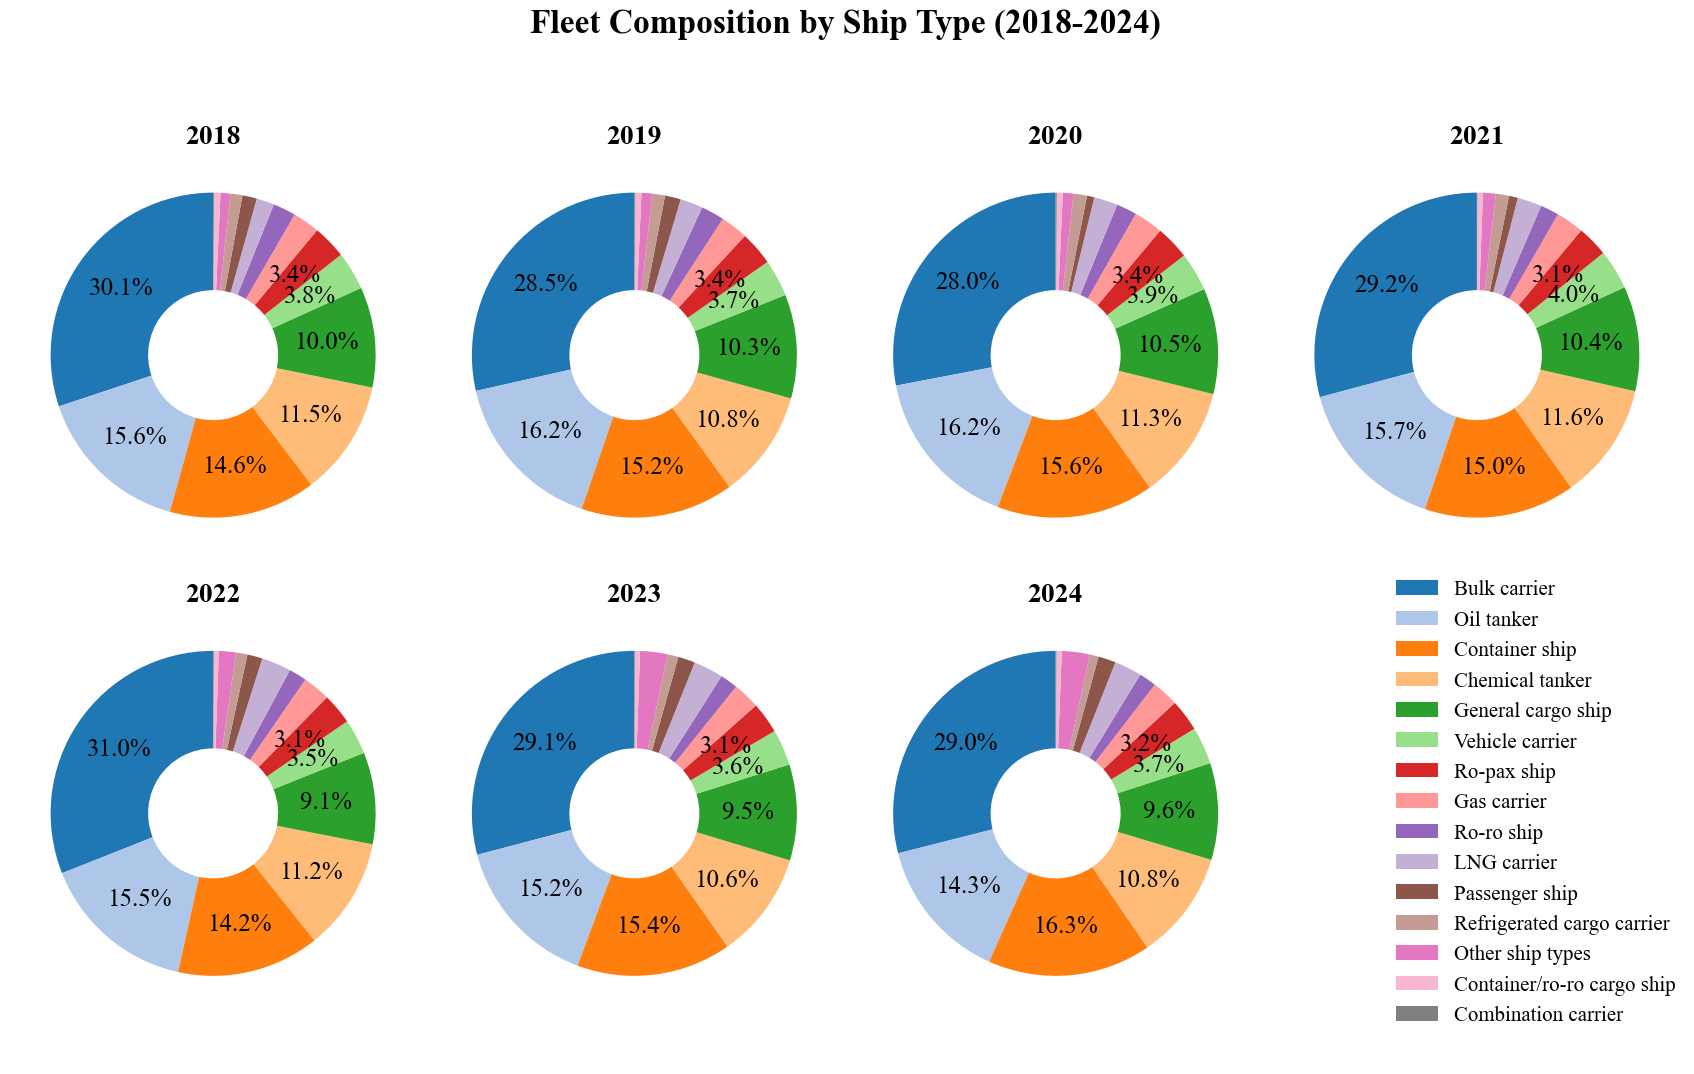

In [6]:
#-----------------------------PIE CHART PLOT (PERCENTAGES)-----------------------------------------------------------------#
import matplotlib.patches as mpatches

# === Aggregate data ===
ship_counts = filtered_data.groupby(["Reporting Period", "Ship type"]).size().reset_index(name="Count")

years = sorted(ship_counts["Reporting Period"].unique())

# --- Determine master order from 2018 (first year) ---
first_year = years[0]
data_2018 = ship_counts[ship_counts["Reporting Period"] == first_year]
ship_types_sorted = data_2018.sort_values("Count", ascending=False)["Ship type"].tolist()

# Map ship types to consistent colors
colors = plt.cm.tab20.colors[:len(ship_types_sorted)]
color_map = {st: colors[i] for i, st in enumerate(ship_types_sorted)}

# === Global style ===
plt.rcParams["font.family"] = "Times New Roman"

# === Create 2-row grid: 4 columns first row, 3 second row ===
fig, axes = plt.subplots(2, 4, figsize=(17, 11.5))
axes = axes.flatten()

for i, year in enumerate(years):
    ax = axes[i]
    data = ship_counts[ship_counts["Reporting Period"] == year]
    counts = [data[data["Ship type"] == st]["Count"].sum() for st in ship_types_sorted]

    total = sum(counts)
    percentages = [(val / total) * 100 if total > 0 else 0 for val in counts]

    wedges, texts = ax.pie(
        counts,
        labels=None,
        startangle=90,
        colors=[color_map[st] for st in ship_types_sorted],
        wedgeprops=dict(width=0.6),
        textprops={"fontsize": 19, "fontname": "Times New Roman"}
    )

    # Show percentages in the pie for the top 7 contributors
    if len(percentages) >= 7:
        top7_threshold = sorted(percentages, reverse=True)[6]
    else:
        top7_threshold = min(percentages)

    for wedge, pct in zip(wedges, percentages):
        if pct >= top7_threshold and pct > 0:
            angle = (wedge.theta2 + wedge.theta1) / 2
            x = 0.7 * np.cos(np.deg2rad(angle))
            y = 0.7 * np.sin(np.deg2rad(angle))
            ax.text(x, y, f"{pct:.1f}%", ha="center", va="center",
                    fontsize=18, fontname="Times New Roman")

    ax.set_title(str(year), fontsize=20, fontweight="bold")

# Hide the last axis (empty)
axes[-1].axis('off')

# === Legend in the same sorted order ===
handles = [mpatches.Patch(facecolor=color_map[st], label=st) for st in ship_types_sorted]

fig.legend(handles=handles,
           loc='lower right',
           ncol=1,
           fontsize=15,
           frameon=False,
           bbox_to_anchor=(1, 0.08))

# Big bold overall title
plt.suptitle("Fleet Composition by Ship Type (2018-2024)",
             fontsize=24, fontweight="bold")
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

# === Save as SVG ===
fig_dir = r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures"
filename = "Fleet_ShipType_PieCharts_Percentages.svg"
save_path = os.path.join(fig_dir, filename)
plt.savefig(save_path, format="svg")

plt.show()

## 3.3 Emissions-Consumption (per Distance) and per Category + Plots

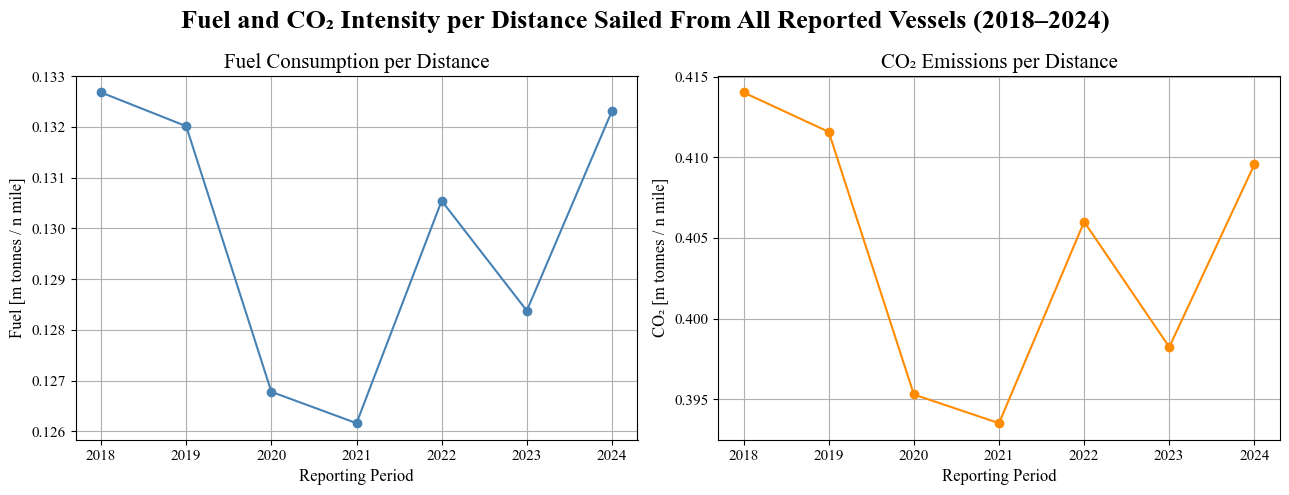

In [7]:
# ------------------------------ EMISSIONS AND CONSUMPTION PER DISTNACE FROM TOTAL ----------------------#
import matplotlib.pyplot as plt 
import os

# ------------------------------ EMISSIONS AND CONSUMPTION PER DISTNACE FROM TOTAL ----------------------#
yearly_Fuel_Consumption = filtered_data.groupby("Reporting Period")["Total fuel consumption [m tonnes]"].sum()
yearly_Distance = filtered_data.groupby("Reporting Period")["Annual Distance per Vessel [n miles]"].sum()
yearly_CO2_Emissions = filtered_data.groupby("Reporting Period")["Total CO₂ emissions [m tonnes]"].sum()

# === Calculate intensity metrics ===
fuel_per_distance = yearly_Fuel_Consumption / yearly_Distance
co2_per_distance = yearly_CO2_Emissions / yearly_Distance

# === Create 1 row × 2 column subplot ===
fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharex=True)

fig.suptitle("Fuel and CO₂ Intensity per Distance Sailed From All Reported Vessels (2018–2024)", 
             fontsize=19, fontweight="bold")

# Fuel per Distance (Blue)
fuel_per_distance.plot(kind="line", marker="o", color="steelblue", ax=axes[0])
axes[0].set_title("Fuel Consumption per Distance")
axes[0].set_xlabel("Reporting Period")
axes[0].set_ylabel("Fuel [m tonnes / n mile]")
axes[0].grid(True)

# CO₂ per Distance (Orange)
co2_per_distance.plot(kind="line", marker="o", color="darkorange", ax=axes[1])
axes[1].set_title("CO₂ Emissions per Distance")
axes[1].set_xlabel("Reporting Period")
axes[1].set_ylabel("CO₂ [m tonnes / n mile]")
axes[1].grid(True)

# --- Save as SVG in same folder ---
filename = "Trend_Fuel_and_CO2_per_Distance.svg"
save_path = os.path.join(fig_dir, filename)
plt.tight_layout()
plt.savefig(save_path, format="svg")

plt.show()

# --------------------------------------------------------------------------------------------------#

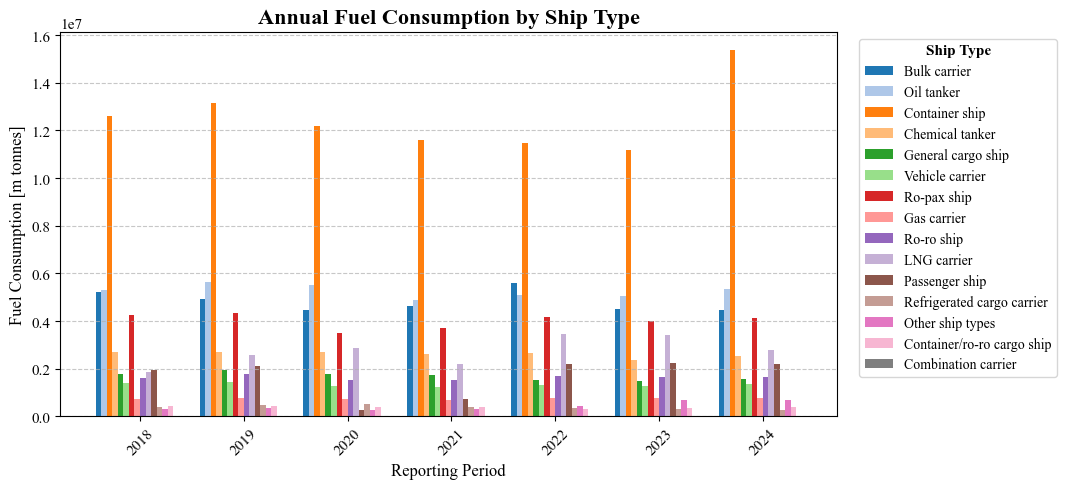

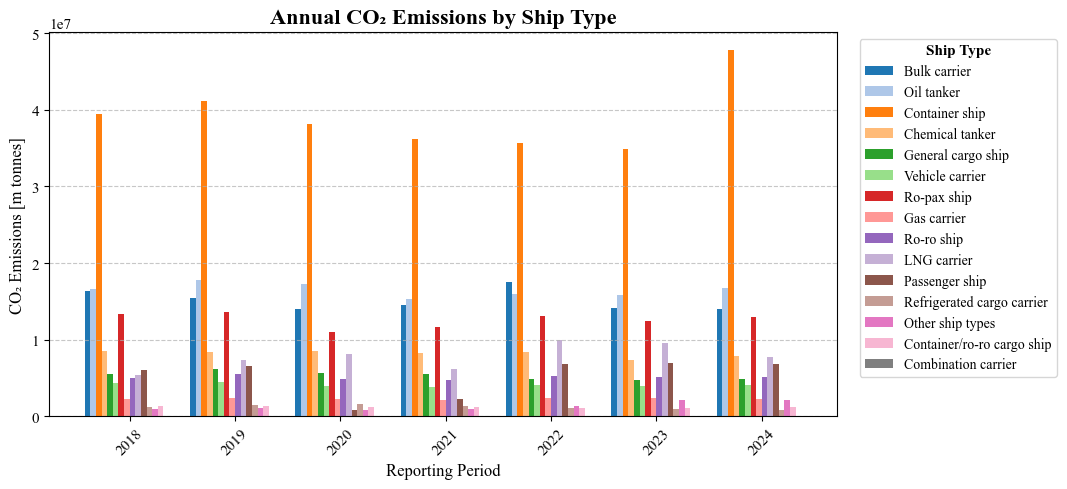

In [8]:
#-----------------------------FUEL & CO2 BAR PLOTS PER CATEGORY---------------------------------------------------------#
import matplotlib.font_manager as fm

# === Aggregate data: sum per year & ship type ===
fuel_counts = filtered_data.groupby(["Reporting Period", "Ship type"])["Total fuel consumption [m tonnes]"].sum().reset_index()
co2_counts = filtered_data.groupby(["Reporting Period", "Ship type"])["Total CO₂ emissions [m tonnes]"].sum().reset_index()

# === Pivot tables for plotting ===
fuel_pivot = fuel_counts.pivot(index="Reporting Period", columns="Ship type", values="Total fuel consumption [m tonnes]").fillna(0)
fuel_pivot = fuel_pivot[ship_types_sorted]  # ensure consistent ship type order

co2_pivot = co2_counts.pivot(index="Reporting Period", columns="Ship type", values="Total CO₂ emissions [m tonnes]").fillna(0)
co2_pivot = co2_pivot[ship_types_sorted]  # ensure consistent ship type order

# === Plot grouped bar chart for Fuel Consumption ===
fig, ax = plt.subplots(figsize=(12, 5))

bar_width = 2
padding = 0.5
n_types = len(ship_types_sorted)
x = np.arange(len(fuel_pivot.index)) * (bar_width + padding)

for i, st in enumerate(ship_types_sorted):
    ax.bar(x + i * bar_width / n_types,
           fuel_pivot[st],
           width=bar_width / n_types,
           label=st,
           color=color_map[st])

ax.set_xticks(x + bar_width/2)
ax.set_xticklabels(fuel_pivot.index, rotation=45)

ax.set_title("Annual Fuel Consumption by Ship Type", fontsize=16, fontweight="bold")
ax.set_xlabel("Reporting Period")
ax.set_ylabel("Fuel Consumption [m tonnes]")

ax.legend(
    title="Ship Type",
    title_fontproperties=fm.FontProperties(weight="bold", size=11),
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    fontsize=10
)

ax.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.9, 1])

# === Save as SVG ===
filename = "Fuel_Consumption_by_ShipType_and_Year_Bar_Plot.svg"
save_path = os.path.join(fig_dir, filename)
plt.savefig(save_path, format="svg")
plt.show()

# === Plot grouped bar chart for CO₂ Emissions ===
fig, ax = plt.subplots(figsize=(12, 5))

x = np.arange(len(co2_pivot.index)) * (bar_width + padding)

for i, st in enumerate(ship_types_sorted):
    ax.bar(x + i * bar_width / n_types,
           co2_pivot[st],
           width=bar_width / n_types,
           label=st,
           color=color_map[st])

ax.set_xticks(x + bar_width/2)
ax.set_xticklabels(co2_pivot.index, rotation=45)

ax.set_title("Annual CO₂ Emissions by Ship Type", fontsize=16, fontweight="bold")
ax.set_xlabel("Reporting Period")
ax.set_ylabel("CO₂ Emissions [m tonnes]")

ax.legend(
    title="Ship Type",
    title_fontproperties=fm.FontProperties(weight="bold", size=11),
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    fontsize=10
)

ax.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.9, 1])

# === Save as SVG ===
filename = "CO2_Emissions_by_ShipType_and_Year_Bar_Plot.svg"
save_path = os.path.join(fig_dir, filename)
plt.savefig(save_path, format="svg")
plt.show()
#-----------------------------------------------------------------------------------------------------------#

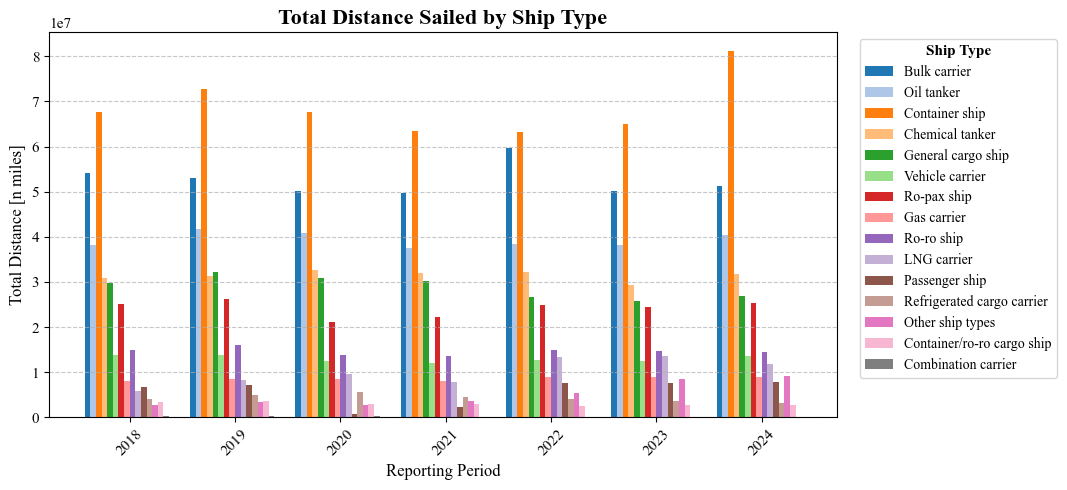

In [9]:
#-----------------------------TOTAL DISTANCE BAR PLOTS PER CATEGORY---------------------------------------------------------#

# === Aggregate data: sum per year & ship type ===
agg_counts = filtered_data.groupby(["Reporting Period", "Ship type"]).agg({"Annual Distance per Vessel [n miles]": "sum"}).reset_index()

# === Pivot table for Total Distance ===
distance_pivot = agg_counts.pivot(index="Reporting Period", columns="Ship type", values="Annual Distance per Vessel [n miles]").fillna(0)
distance_pivot = distance_pivot[ship_types_sorted]

# === Plot grouped bar chart for Total Distance ===
fig, ax = plt.subplots(figsize=(12, 5))

bar_width = 2
padding = 0.5
n_types = len(ship_types_sorted)
x = np.arange(len(distance_pivot.index)) * (bar_width + padding)

for i, st in enumerate(ship_types_sorted):
    ax.bar(x + i * bar_width / n_types,
           distance_pivot[st],
           width=bar_width / n_types,
           label=st,
           color=color_map[st])

ax.set_xticks(x + bar_width/2)
ax.set_xticklabels(distance_pivot.index, rotation=45)

ax.set_title("Total Distance Sailed by Ship Type", fontsize=16, fontweight="bold")
ax.set_xlabel("Reporting Period")
ax.set_ylabel("Total Distance [n miles]")

ax.legend(
    title="Ship Type",
    title_fontproperties=fm.FontProperties(weight="bold", size=11),
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    fontsize=10
)

ax.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.9, 1])

# === Save as SVG ===
filename = "Total_Distance_by_ShipType_and_Year_Bar_Plot.svg"
save_path = os.path.join(fig_dir, filename)
plt.savefig(save_path, format="svg")
plt.show()

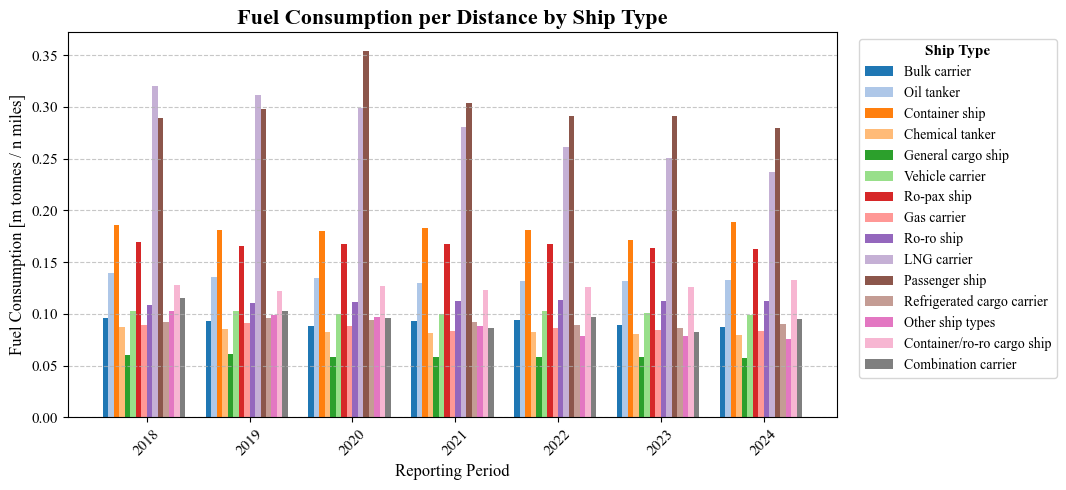

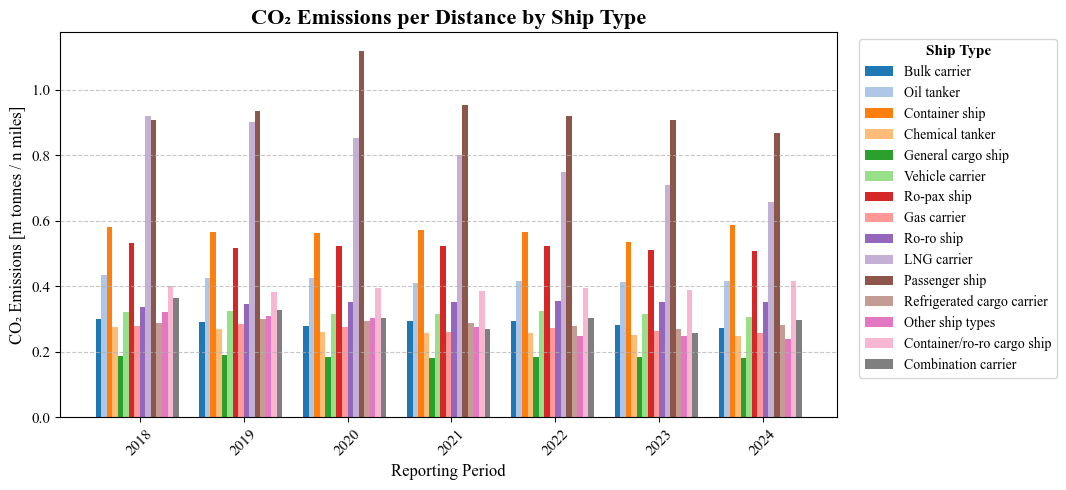

In [10]:
#----------------------------- (FUEL & CO2) / DISTANCE - BAR PLOTS PER CATEGORY---------------------------------------------------------#

#-----------------------------FUEL & CO2 PER MILE BAR PLOTS PER CATEGORY---------------------------------------------------------#

# === Aggregate data: sum per year & ship type ===
agg_counts = filtered_data.groupby(["Reporting Period", "Ship type"]).agg({
    "Total fuel consumption [m tonnes]": "sum",
    "Total CO₂ emissions [m tonnes]": "sum",
    "Annual Distance per Vessel [n miles]": "sum"
}).reset_index()

# === Pivot tables for plotting ===
fuel_per_mile_pivot = (agg_counts.pivot(index="Reporting Period", columns="Ship type", values="Total fuel consumption [m tonnes]") / 
                       agg_counts.pivot(index="Reporting Period", columns="Ship type", values="Annual Distance per Vessel [n miles]")).fillna(0)
fuel_per_mile_pivot = fuel_per_mile_pivot[ship_types_sorted]  # ensure consistent ship type order

co2_per_mile_pivot = (agg_counts.pivot(index="Reporting Period", columns="Ship type", values="Total CO₂ emissions [m tonnes]") / 
                      agg_counts.pivot(index="Reporting Period", columns="Ship type", values="Annual Distance per Vessel [n miles]")).fillna(0)
co2_per_mile_pivot = co2_per_mile_pivot[ship_types_sorted]  # ensure consistent ship type order

# === Plot grouped bar chart for Fuel per Mile ===
fig, ax = plt.subplots(figsize=(12, 5))

bar_width = 2
padding = 0.5
n_types = len(ship_types_sorted)
x = np.arange(len(fuel_per_mile_pivot.index)) * (bar_width + padding)

for i, st in enumerate(ship_types_sorted):
    ax.bar(x + i * bar_width / n_types,
           fuel_per_mile_pivot[st],
           width=bar_width / n_types,
           label=st,
           color=color_map[st])

ax.set_xticks(x + bar_width/2)
ax.set_xticklabels(fuel_per_mile_pivot.index, rotation=45)

ax.set_title("Fuel Consumption per Distance by Ship Type", fontsize=16, fontweight="bold")
ax.set_xlabel("Reporting Period")
ax.set_ylabel("Fuel Consumption [m tonnes / n miles]")

ax.legend(
    title="Ship Type",
    title_fontproperties=fm.FontProperties(weight="bold", size=11),
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    fontsize=10
)

ax.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.9, 1])

# === Save as SVG ===
filename = "Fuel_per_Mile_by_ShipType_and_Year_Bar_Plot.svg"
save_path = os.path.join(fig_dir, filename)
plt.savefig(save_path, format="svg")
plt.show()

# === Plot grouped bar chart for CO₂ per Mile ===
fig, ax = plt.subplots(figsize=(12, 5))

x = np.arange(len(co2_per_mile_pivot.index)) * (bar_width + padding)

for i, st in enumerate(ship_types_sorted):
    ax.bar(x + i * bar_width / n_types,
           co2_per_mile_pivot[st],
           width=bar_width / n_types,
           label=st,
           color=color_map[st])

ax.set_xticks(x + bar_width/2)
ax.set_xticklabels(co2_per_mile_pivot.index, rotation=45)

ax.set_title("CO₂ Emissions per Distance by Ship Type", fontsize=16, fontweight="bold")
ax.set_xlabel("Reporting Period")
ax.set_ylabel("CO₂ Emissions [m tonnes / n miles]")

ax.legend(
    title="Ship Type",
    title_fontproperties=fm.FontProperties(weight="bold", size=11),
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    fontsize=10
)

ax.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.9, 1])

# === Save as SVG ===
filename = "CO2_per_Mile_by_ShipType_and_Year_Bar_Plot.svg"
save_path = os.path.join(fig_dir, filename)
plt.savefig(save_path, format="svg")
plt.show()
#-----------------------------------------------------------------------------------------------------------#

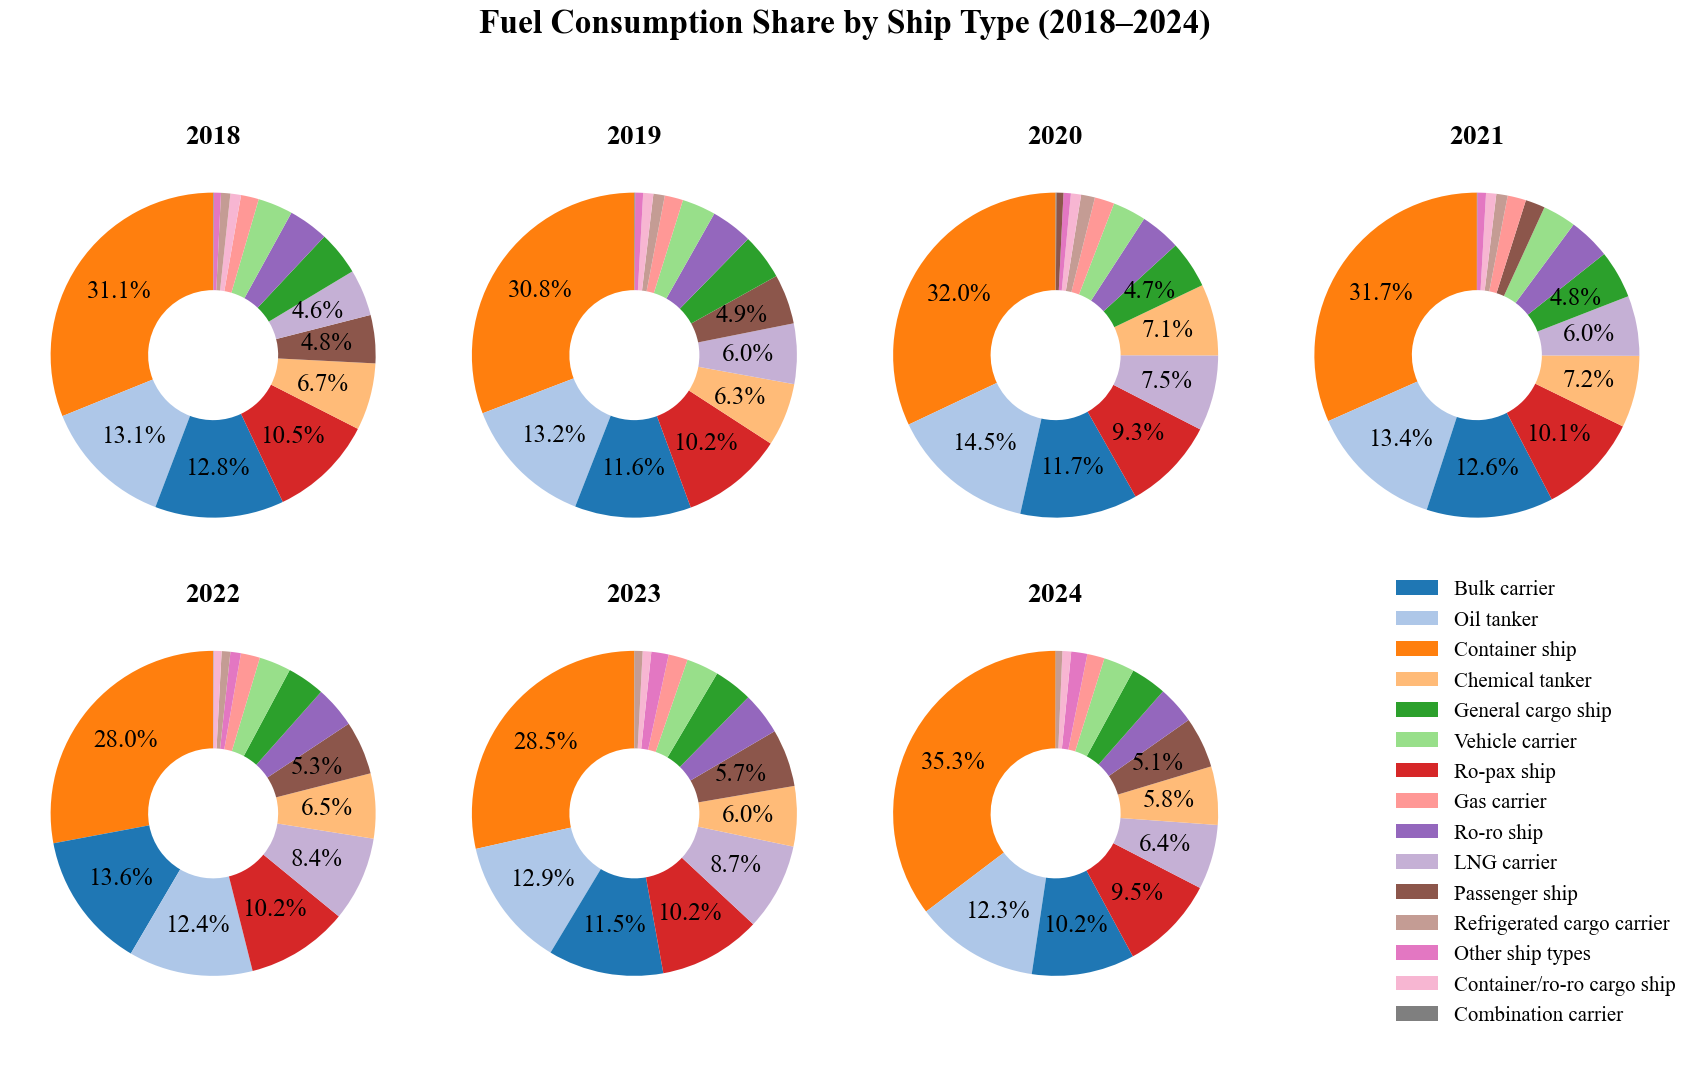

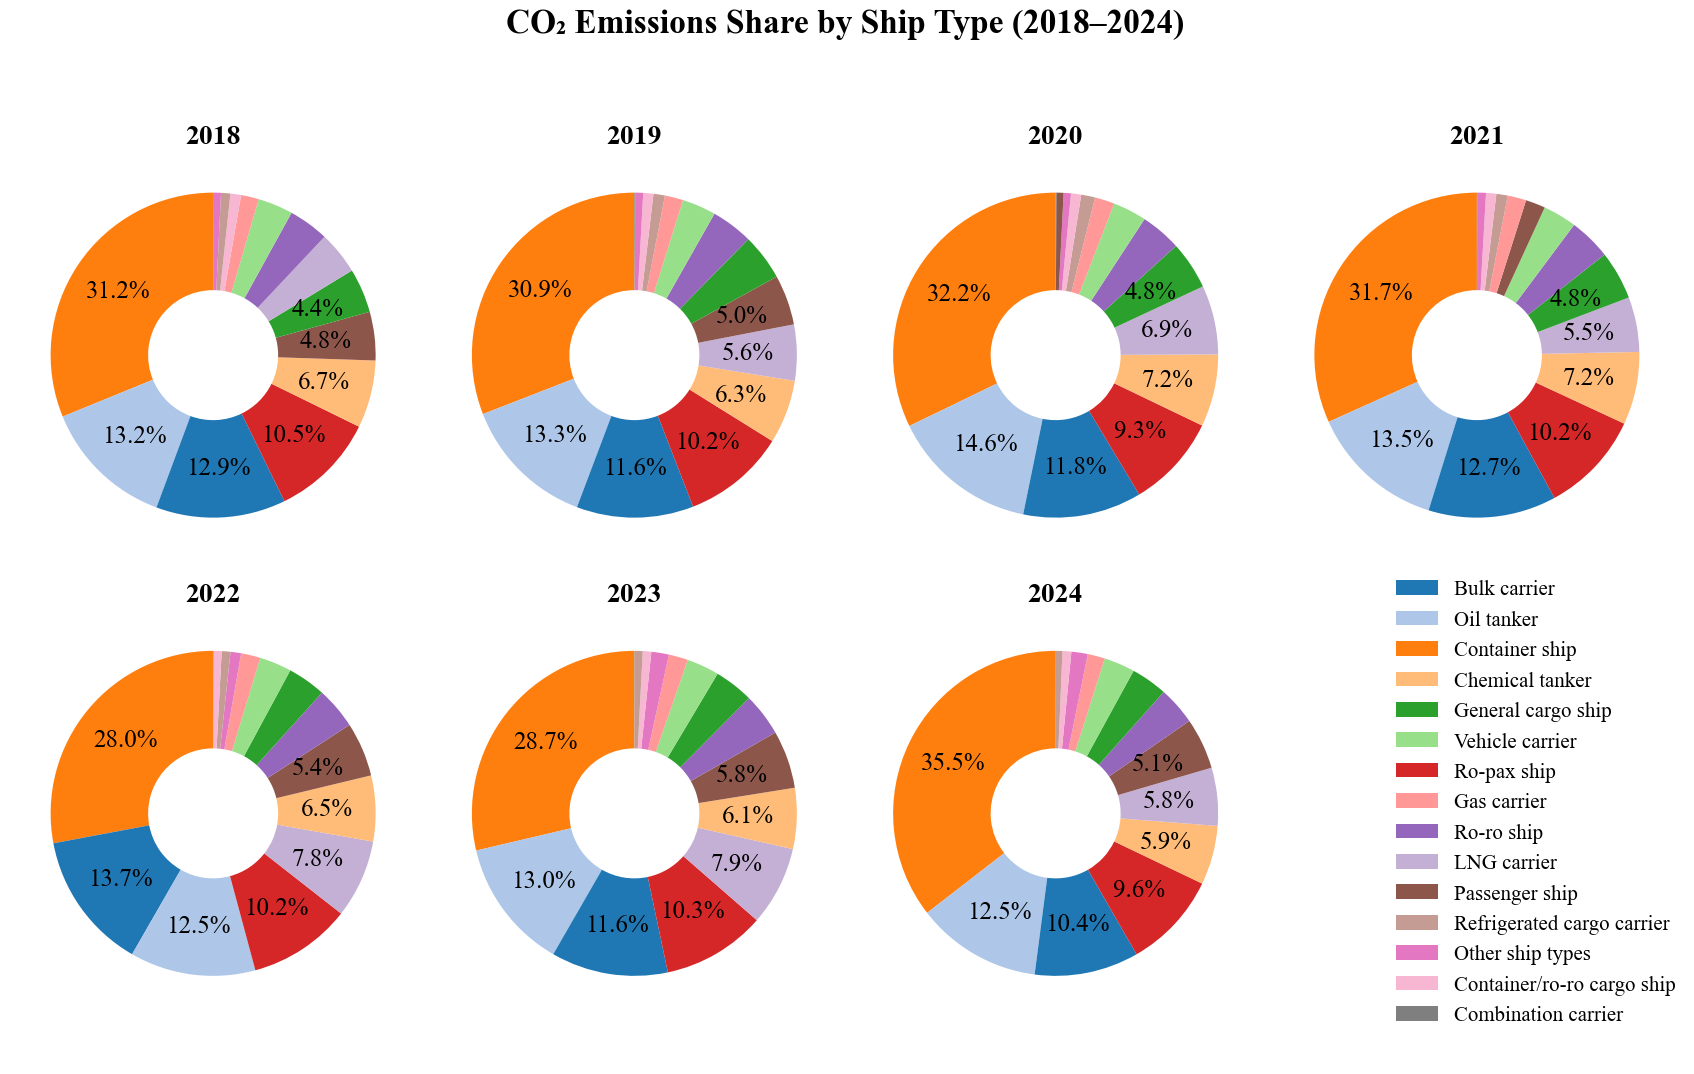

In [11]:
#----------------------------- FUEL & CO₂ EMISSIONS PIE CHARTS (PERCENTAGES, CONSISTENT COLORS) -----------------------------#

# === Aggregate data ===
agg_counts = filtered_data.groupby(["Reporting Period", "Ship type"]).agg({
    "Total fuel consumption [m tonnes]": "sum",
    "Total CO₂ emissions [m tonnes]": "sum",
    "Annual Distance per Vessel [n miles]": "sum"
}).reset_index()

# Function to plot pie charts
def plot_pie_grid(pivot_df, title_prefix, filename, top_n_label=7, n_cols=4):
    years = sorted(pivot_df.index)
    n_rows = int(np.ceil(len(years) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(17, 11.5))
    axes = axes.flatten()

    for i, year in enumerate(years):
        ax = axes[i]
        data = pivot_df.loc[year]

        # Sort ship types by descending value for this year
        sorted_types = data.sort_values(ascending=False).index.tolist()
        counts = [data[st] for st in sorted_types]

        total = sum(counts)
        percentages = [(val / total) * 100 if total > 0 else 0 for val in counts]

        # Pie chart using MASTER color_map
        wedges, texts = ax.pie(
            counts,
            labels=None,
            startangle=90,
            colors=[color_map[st] for st in sorted_types],  # consistent colors
            wedgeprops=dict(width=0.6),
            textprops={"fontsize": 19, "fontname": "Times New Roman"}
        )

        # Label top N contributors with percentages
        if len(percentages) >= top_n_label:
            threshold = sorted(percentages, reverse=True)[top_n_label - 1]
        else:
            threshold = min(percentages) if percentages else 0

        for wedge, pct in zip(wedges, percentages):
            if pct >= threshold and pct > 0:
                angle = (wedge.theta2 + wedge.theta1) / 2
                x = 0.7 * np.cos(np.deg2rad(angle))
                y = 0.7 * np.sin(np.deg2rad(angle))
                ax.text(x, y, f"{pct:.1f}%", ha="center", va="center",
                        fontsize=18, fontname="Times New Roman")

        ax.set_title(str(year), fontsize=20, fontweight="bold")

    # Hide extra axes
    for j in range(len(years), len(axes)):
        axes[j].axis('off')

    # Legend in master order
    handles = [mpatches.Patch(facecolor=color_map[st], label=st) for st in ship_types_sorted]
    fig.legend(handles=handles,
               loc='lower right',
               ncol=1,
               fontsize=15,
               frameon=False,
               bbox_to_anchor=(1, 0.08))

    plt.suptitle(f"{title_prefix} ({years[0]}–{years[-1]})",
                 fontsize=24, fontweight="bold")
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])

    # Save
    save_path = os.path.join(fig_dir, filename)
    plt.savefig(save_path, format="svg")
    plt.show()


# === Pivot tables for Fuel and CO₂ ===
fuel_pivot = agg_counts.pivot(index="Reporting Period", columns="Ship type",
                              values="Total fuel consumption [m tonnes]").fillna(0)

co2_pivot = agg_counts.pivot(index="Reporting Period", columns="Ship type",
                             values="Total CO₂ emissions [m tonnes]").fillna(0)

# === Plot Fuel Consumption pies ===
plot_pie_grid(fuel_pivot,
              title_prefix="Fuel Consumption Share by Ship Type",
              filename="Fuel_Consumption_Share_by_ShipType_and_Year_PieCharts.svg")

# === Plot CO₂ Emissions pies ===
plot_pie_grid(co2_pivot,
              title_prefix="CO₂ Emissions Share by Ship Type",
              filename="CO2_Emissions_Share_by_ShipType_and_Year_PieCharts.svg")

## 3.4 Measurement Methods + Plots

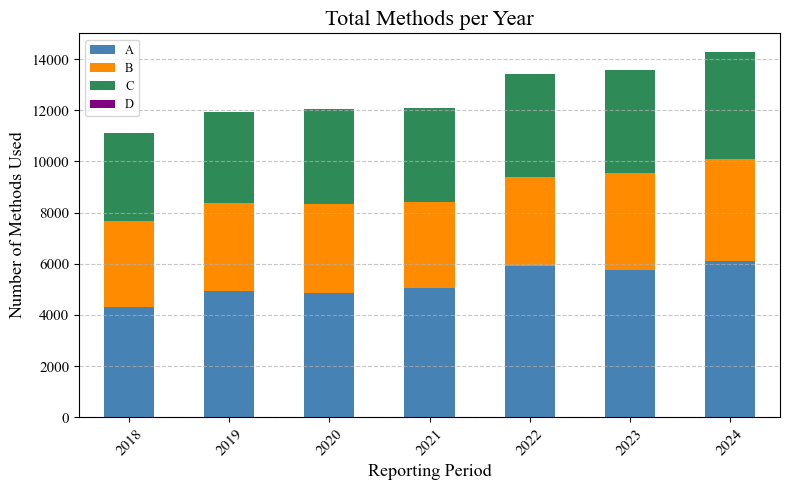

In [12]:
import matplotlib.pyplot as plt
import os

A_count = filtered_data.groupby("Reporting Period")["A"].agg(lambda x: (x == "Yes").sum())
B_count = filtered_data.groupby("Reporting Period")["B"].agg(lambda x: (x == "Yes").sum())
C_count = filtered_data.groupby("Reporting Period")["C"].agg(lambda x: (x == "Yes").sum())
D_count = filtered_data.groupby("Reporting Period")["D"].agg(lambda x: (x == "Yes").sum())
total_methods = A_count + B_count + C_count + D_count

# === Combine into a DataFrame for stacked bar plot ===
stacked_df = pd.concat([A_count, B_count, C_count, D_count], axis=1)
stacked_df.columns = ["A", "B", "C", "D"]

# === Global style ===
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11

# === Plot stacked bar chart ===
FIGSIZE = (8, 5)
ax = stacked_df.plot(kind="bar", stacked=True, figsize=FIGSIZE,
                     color=["steelblue", "darkorange", "seagreen", "purple"])

ax.set_title("Total Methods per Year")
ax.set_xlabel("Reporting Period")
ax.set_ylabel("Number of Methods Used")
plt.xticks(rotation=45)
# Add grid
ax.grid(True, axis='y', linestyle='--', alpha=0.7)  # horizontal grid lines
# Make legend smaller
ax.legend(fontsize=9)  # adjust the number as needed
plt.tight_layout()

# === Save as SVG ===
fig_dir = r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures"
filename = "Total_Methods_Stacked.svg"
save_path = os.path.join(fig_dir, filename)
plt.savefig(save_path, format="svg")

plt.show()

## 3.5 Annual Total Fuel, CO2, Distance and Average Speed + Plots

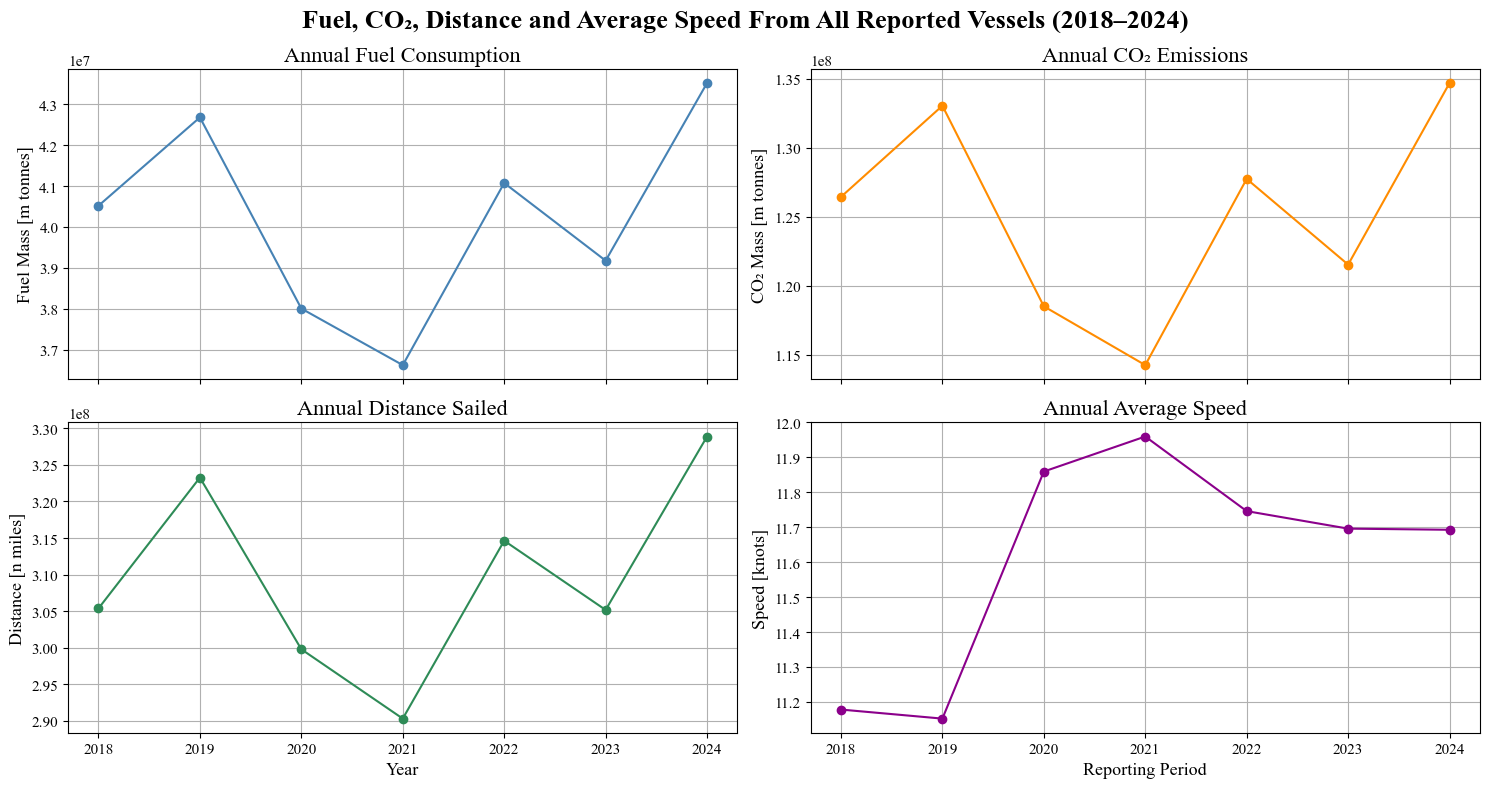

In [13]:
import matplotlib.pyplot as plt
import os

# Group by Year and sum
yearly_Fuel_Consumption = filtered_data.groupby("Reporting Period")["Total fuel consumption [m tonnes]"].sum()
yearly_CO2_Emissions = filtered_data.groupby("Reporting Period")["Total CO₂ emissions [m tonnes]"].sum()
yearly_Distance = filtered_data.groupby("Reporting Period")["Annual Distance per Vessel [n miles]"].sum()
yearly_Average_speed = filtered_data.groupby("Reporting Period")["Annual Average Speed per Vessel [knots]"].mean()

# Set global style: Times New Roman everywhere
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.titlesize"] = 16   # bigger titles
plt.rcParams["axes.labelsize"] = 13   # axis labels slightly smaller
plt.rcParams["xtick.labelsize"] = 11  # tick labels smaller
plt.rcParams["ytick.labelsize"] = 11

# Fixed size for consistency
#FIGSIZE = (8, 5)

# === Create 3 subplots ===
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True)
# Flatten axes array for easy indexing
axes = axes.flatten()

fig.suptitle("Fuel, CO₂, Distance and Average Speed From All Reported Vessels (2018–2024)", 
             fontsize=19, fontweight="bold")

# Fuel Consumption (Blue)
yearly_Fuel_Consumption.plot(kind="line", marker="o", color="steelblue", ax=axes[0])
axes[0].set_title("Annual Fuel Consumption")
axes[0].set_ylabel("Fuel Mass [m tonnes]")
axes[0].set_xlabel("Year")
axes[0].grid(True)

# CO₂ Emissions (Orange)
yearly_CO2_Emissions.plot(kind="line", marker="o", color="darkorange", ax=axes[1])
axes[1].set_title("Annual CO₂ Emissions")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("CO₂ Mass [m tonnes]")
axes[1].grid(True)

# Distance (Green)
yearly_Distance.plot(kind="line", marker="o", color="seagreen", ax=axes[2])
axes[2].set_title("Annual Distance Sailed")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Distance [n miles]")
axes[2].grid(True)

# Speed (Magenta)
yearly_Average_speed.plot(kind="line", marker="o", color="darkmagenta", ax=axes[3])
axes[3].set_title("Annual Average Speed")
axes[3].set_xlabel("Reporting Period")
axes[3].set_ylabel("Speed [knots]")
axes[3].grid(True)

# ----Figures folder (give once)----
fig_dir = r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures"

#-----SAVE-----------#
filename = "Trend of Fuel CO2 and Distance and Speed.svg"   # <-- only change this part per figure
save_path = os.path.join(fig_dir, filename)
plt.tight_layout()
plt.savefig(save_path, format="svg")

plt.show()

# 4. Basic Statistics

## 4.1 For Each year & Whole Period: Consumption

In [14]:
#------------------------------- BASIC STATISTCS PER YEAR AND WHOLE PERIOD: WEIGHTED MEAN + STD, MIN, MAX, S, K------------------------------------#

#------------------------------- WEIGHTED MEAN + STD, MIN, MAX, S, K----------------------------------------------#
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Function for weighted mean & weighted std
def weighted_stats(values, weights):
    w_mean = np.average(values, weights=weights)
    w_var = np.average((values - w_mean) ** 2, weights=weights)
    w_std = np.sqrt(w_var)
    return w_mean, w_std

# Main function to compute statistics
def compute_stats(filtered_data):
    results = []

    for (year, ship_type), group in filtered_data.groupby(["Reporting Period", "Ship type"]):
        values = group["Annual average Fuel consumption per distance [kg / n mile]"]
        total_fuel = group["Total fuel consumption [m tonnes]"].sum()
        weights = (group["Total fuel consumption [m tonnes]"] / total_fuel).values

        # Weighted mean & std
        w_mean, w_std = weighted_stats(values.values, weights)

        # Unweighted stats
        results.append({
            "Year": year,
            "Ship Type": ship_type,
            "Weighted Mean": w_mean,
            "Weighted SD": w_std,
            "Median": values.median(),
            "Min": values.min(),
            "Max": values.max(),
            "Skewness": skew(values, bias=False),
            "Kurtosis": kurtosis(values, bias=False),
        })

    stats_df = pd.DataFrame(results)
    return stats_df.sort_values(["Year", "Weighted Mean"], ascending=[True, False]).reset_index(drop=True)

# Results
stats_per_year = compute_stats(filtered_data)

#------------------------------- WEIGHTED STATS PER SHIP TYPE ACROSS ALL YEARS -------------------------------#
def compute_stats_all_years(filtered_data):
    results = []

    for ship_type, group in filtered_data.groupby("Ship type"):
        values = group["Annual average Fuel consumption per distance [kg / n mile]"]
        total_fuel = group["Total fuel consumption [m tonnes]"].sum()
        weights = (group["Total fuel consumption [m tonnes]"] / total_fuel).values

        # Weighted mean & std
        w_mean, w_std = weighted_stats(values.values, weights)

        # Unweighted stats
        results.append({
            "Ship Type": ship_type,
            "Weighted Mean": w_mean,
            "Weighted SD": w_std,
            "Median": values.median(),
            "Min": values.min(),
            "Max": values.max(),
            "Skewness": skew(values, bias=False),
            "Kurtosis": kurtosis(values, bias=False),
        })

    return pd.DataFrame(results).sort_values("Weighted Mean", ascending=False).reset_index(drop=True)

# Run computation
stats_all_years = compute_stats_all_years(filtered_data)

## 4.2 For Each year & Whole Period: CO2

In [15]:
#------------------------------- BASIC STATISTCS PER YEAR AND WHOLE PERIOD: WEIGHTED MEAN + STD, MIN, MAX, S, K------------------------------------#

#------------------------------- SAME BUT FOR CO2----------------------------------------------#
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

#------------------------------- WEIGHTED STATS PER SHIP TYPE ACROSS ALL YEARS -------------------------------#
def compute_stats_all_years_CO2(filtered_data):
    results = []

    for ship_type, group in filtered_data.groupby("Ship type"):
        values = group["Annual average CO₂ emissions per distance [kg CO₂ / n mile]"]
        total_fuel = group["Total CO₂ emissions [m tonnes]"].sum()
        weights = (group["Total CO₂ emissions [m tonnes]"] / total_fuel).values

        # Weighted mean & std
        w_mean, w_std = weighted_stats(values.values, weights)

        # Unweighted stats
        results.append({
            "Ship Type": ship_type,
            "Weighted Mean": w_mean,
            "Weighted SD": w_std,
            "Median": values.median(),
            "Min": values.min(),
            "Max": values.max(),
            "Skewness": skew(values, bias=False),
            "Kurtosis": kurtosis(values, bias=False),
        })

    return pd.DataFrame(results).sort_values("Weighted Mean", ascending=False).reset_index(drop=True)

# Run computation
stats_CO2_all_years = compute_stats_all_years_CO2(filtered_data)

## 4.3 Export to Word

In [16]:
# ------ EXPORT TABLES TO WORD -----------#
from docx import Document

#----FUNCTION FOR EXPORTING TO WORD-------#
def df_to_word(df, filename="output.docx"):
    doc = Document()

    # Add title
    doc.add_heading("Ship Fuel Consumption Statistics", level=1)

    # Create table with extra row for headers
    table = doc.add_table(rows=1, cols=len(df.columns))
    table.style = "Table Grid"

    # Add headers
    hdr_cells = table.rows[0].cells
    for i, col_name in enumerate(df.columns):
        hdr_cells[i].text = str(col_name)

    # Add rows
    for _, row in df.iterrows():
        row_cells = table.add_row().cells
        for i, val in enumerate(row):
            # Format floats to 2 decimals
            if isinstance(val, (int, float)):
                row_cells[i].text = f"{val:.2f}"
            else:
                row_cells[i].text = str(val)

    # Save file
    doc.save(filename)
#----------------------------------------------------#

# Example usage
df_to_word(stats_CO2_all_years, "stats_CO2_all_years.docx")

# 5. Basic Statistics on Efficieny

## 5.1 FILTERING on Efficieny for the desired 4 ship types

In [9]:
# --- FILTER ON EFFICIENCY FOR 4 SHIP CATEGORIES---#

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

ship_types = ["Bulk carrier", "Oil tanker", "Container ship", "Chemical tanker"]

x_col = "Technical efficiency Index Value [gCO₂/t·nm]"
y_col = "Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]"
cols_to_filter_by = [y_col, x_col]

# --- Filtering across all ship types at once ---
outlier_counts, thresholds, all_filtered_data = count_outliers_by_group_two_cols(
    filtered_data,
    cols=cols_to_filter_by,
    group_col="Ship type",
    lower=0.025,
    upper=0.975,
    return_filtered=True
)

# --- Print summary of filtering --- #
for ship_type in ship_types:
    total_ship_rows = len(filtered_data[filtered_data["Ship type"] == ship_type])
    remaining_rows = len(all_filtered_data[all_filtered_data["Ship type"] == ship_type])

    print(f"\n================= {ship_type} =================")
    print(f"{ship_type} rows before filtering: {total_ship_rows}")
    print(f"{ship_type} rows after filtering: {remaining_rows}")

# Use filtered data for analysis
filtered_data_efficiency = all_filtered_data

# Keep only the desired "Ship Types"
filtered_data_efficiency = all_filtered_data[
    all_filtered_data["Ship type"].isin(ship_types)
].copy()


================= Bulk carrier =================
Bulk carrier rows before filtering: 22709
Bulk carrier rows after filtering: 19460

================= Oil tanker =================
Oil tanker rows before filtering: 12035
Oil tanker rows after filtering: 10573

================= Container ship =================
Container ship rows before filtering: 11779
Container ship rows after filtering: 10050

================= Chemical tanker =================
Chemical tanker rows before filtering: 8611
Chemical tanker rows after filtering: 7370


## 5.2 Descriptive Statistics before Panel

In [10]:
from scipy.stats import skew, kurtosis
import pandas as pd

def compute_descriptive_stats(df, vars_list, group_col=None, corr_ref=None):
    """
    Compute descriptive statistics for a list of numeric variables.
    If group_col is provided, compute per group; otherwise overall.
    """
    results = []

    # If grouping column is given, group; else treat as single group
    grouped = df.groupby(group_col) if group_col else [(None, df)]

    for group_name, group in grouped:
        for var in vars_list:
            data = group[var].dropna()
            stats = {
                "Group": group_name if group_col else "Overall",
                "Variable": var,
                "Mean": data.mean(),
                "SD": data.std(),
                "Median": data.median(),
                "Min": data.min(),
                "Max": data.max(),
                "Skewness": skew(data, bias=False),
                "Kurtosis": kurtosis(data, bias=False)
            }

            if corr_ref and corr_ref in group.columns and var != corr_ref:
                corr_xy = group[[var, corr_ref]].corr().iloc[0, 1]
                stats[f"Correlation (vs. {corr_ref})"] = round(corr_xy, 2)
            else:
                stats[f"Correlation (vs. {corr_ref})"] = None

            results.append(stats)

    return pd.DataFrame(results)

# Example usage:
#desc = compute_descriptive_stats(
#    filtered_data_efficiency,
#    vars_list=[
 #       "Technical efficiency Index Value [gCO₂/t·nm]",
 #       "Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]",
 #       "Speed [knots]",
 #       "Age [years]",
 #       "DWT [t]"
 #   ],
 #   group_col="Ship type",
 #   corr_ref="Technical efficiency Index Value [gCO₂/t·nm]"  # optional
#)

# Round and display nicely
#print(desc.round(2).to_string(index=False))

# 6. Prepare Panel for Regression Models

## 6.1 Import List Data - IMO

In [11]:
file_path = r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Original_Data\ListIMO.xlsx"

# Read Excel file, assuming first row contains headers
data_list = pd.read_excel(file_path, header=0)  # header=0 means first row is column names

# Drop rows where 'IMO Number' is NaN
data_list_clean = data_list.dropna(subset=['IMO Number'])

# Optional: reset the index after dropping rows
data_list_clean.reset_index(drop=True, inplace=True)

## 6.2 Match IMO Numbers

In [12]:
import pandas as pd

# Merge the two data frames on 'IMO Number'
combined_df = pd.merge(
    data_list_clean,                # List
    filtered_data_efficiency,       # Filtered Data (only the DESIRED SHIP CATEGORIES)
    on='IMO Number',                # column to join on
    how='inner'                     # only keep rows with IMO Numbers in both
)

# Select only the columns we want
# For example, keeping:
# 'Ship type', 'IMO Number', 'DWT', 'Year of Built' from data_list_clean
# and 'Name', 'Technical efficiency Index Value [gCO₂/t·nm]', 
# 'Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]', 
# 'Annual Average Speed per Vessel [knots]' from filtered_data_efficiency

columns_to_keep = [
    'Ship type', 'IMO Number','Name', 'Reporting Period',
    'DWT', 'Built',
    'Technical efficiency Index Value [gCO₂/t·nm]',
    'Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]',
    'Annual Average Speed per Vessel [knots]'
]

combined_df = combined_df[columns_to_keep]

# Assuming 'Reporting Period' and 'Year of Built' are numeric
combined_df['Age'] = combined_df['Reporting Period'] - combined_df['Built']

# Check the result
print(combined_df.head())
print(combined_df.info())

        Ship type  IMO Number         Name  Reporting Period       DWT  \
0  Container ship   9893929.0     EVER ALP              2022  241960.0   
1  Container ship   9893929.0     EVER ALP              2023  241960.0   
2  Container ship   9922603.0  OOCL SWEDEN              2024  224969.0   
3  Container ship   9908126.0   OOCL SPAIN              2023  224969.0   
4  Container ship   9908126.0   OOCL SPAIN              2024  224969.0   

    Built  Technical efficiency Index Value [gCO₂/t·nm]  \
0  2021.0                                          6.60   
1  2021.0                                          6.60   
2  2024.0                                          6.70   
3  2023.0                                          6.77   
4  2023.0                                          6.77   

   Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]  \
0                                               6.71                                     
1                   

### 6.2.1 Umatched vessels per Year

In [21]:
import pandas as pd

# Step 1: Count total vessels per Reporting Period and ship type
total_counts = (
    filtered_data_efficiency
    .groupby(['Reporting Period', 'Ship type'])['IMO Number']
    .nunique()
    .reset_index()
)
total_counts.rename(columns={'IMO Number': 'Total Vessels'}, inplace=True)

# Step 2: Count matched vessels per Reporting Period and ship type
matched_counts = (
    combined_df
    .groupby(['Reporting Period', 'Ship type'])['IMO Number']
    .nunique()
    .reset_index()
)
matched_counts.rename(columns={'IMO Number': 'Matched Vessels'}, inplace=True)

# Step 3: Merge total and matched counts
report_df = pd.merge(
    total_counts,
    matched_counts,
    on=['Reporting Period', 'Ship type'],
    how='left'
)
report_df['Matched Vessels'] = report_df['Matched Vessels'].fillna(0)

# Step 4: Calculate unmatched vessels
report_df['Unmatched Vessels'] = report_df['Total Vessels'] - report_df['Matched Vessels']

# Step 5: Filter only rows with unmatched vessels
unmatched_df = report_df[report_df['Unmatched Vessels'] > 0]

# Step 6: Pivot table for unmatched vessels
unmatched_pivot = unmatched_df.pivot_table(
    index='Ship type',
    columns='Reporting Period',
    values='Unmatched Vessels',
    fill_value=0
)

# Ensure year columns are integers
unmatched_pivot.columns = unmatched_pivot.columns.astype(int)

# Reorder columns in descending order
unmatched_pivot_filtered = unmatched_pivot[sorted(unmatched_pivot.columns, reverse=True)].copy()

# Step 7: Calculate fleet averages from total vessels
total_pivot = total_counts.pivot_table(
    index='Ship type',
    columns='Reporting Period',
    values='Total Vessels',
    fill_value=0
)
total_pivot.columns = total_pivot.columns.astype(int)
total_pivot_filtered = total_pivot[sorted(total_pivot.columns, reverse=True)].copy()

# Add average and std of fleet size
unmatched_pivot_filtered['Fleet Time Average'] = total_pivot_filtered.mean(axis=1)
unmatched_pivot_filtered['Fleet STD'] = total_pivot_filtered.std(axis=1)

# Sort ship types alphabetically
unmatched_pivot_filtered.sort_index(inplace=True)

# Format numbers to 2 decimals
unmatched_pivot_filtered = unmatched_pivot_filtered.round(2)

# Print with a title
print("\n========== Unmatched IMO Numbers ==========\n")
unmatched_pivot_filtered


========== Unmatched IMO Numbers ==========



Reporting Period,2024,2023,2022,2021,2020,2019,2018,Fleet Time Average,Fleet STD
Ship type,,,,,,,,,
Bulk carrier,6.0,9.0,12.0,13.0,17.0,27.0,26.0,2780.00,327.55
Chemical tanker,2.0,2.0,2.0,4.0,7.0,14.0,13.0,1052.86,124.09
Container ship,2.0,13.0,31.0,25.0,30.0,49.0,37.0,1435.71,275.19
Oil tanker,0.0,1.0,2.0,9.0,14.0,20.0,19.0,1510.43,135.57


## 6.3 Panel Dataframe: Categories and Sorting

In [22]:
#----- function of classification regarding DWT ------------#

def classify_vessel(row):
    dwt = row["DWT"]
    ship_type = row["Ship type"]

    # Bulk carriers
    if ship_type == "Bulk carrier":
        if dwt < 24000:
            return "Mini Bulk Carrier"
        elif dwt < 35000:
            return "Handysize"
        elif dwt < 50000:
            return "Handymax"
        elif dwt < 61000:
            return "Supramax"
        elif dwt < 80000:
            return "Panamax"
        else:
            return "Capesize" #there were a frew VLBC that is why they are combined
    
    # Oil tankers
    elif ship_type == "Oil tanker":
        if dwt < 37000:
            return "Handysize"
        elif dwt < 45000:
            return "MR1"
        elif dwt < 55000:
            return "MR2"
        elif dwt < 80000:
            return "Panamax"
        elif dwt < 120000:
            return "Aframax"
        elif dwt < 160000:
            return "Suezmax"
        else:
            return "VLCC" #there were a frew ULCC that is why they are combined

    # Chemical tankers
    elif ship_type == "Chemical tanker":
        if dwt < 37000:
            return "Handysize"
        elif dwt < 45000:
            return "MR1"
        elif dwt < 55000:
            return "MR2"
        elif dwt < 80000:
            return "LR1"
        elif dwt < 120000:
            return "LR2"
        elif dwt < 160000:
            return "Suezmax"
        else:
            return "VLCC" #there were no ULCC that is why they are combined

    # Container ships (approximate by DWT) - used an approximate factor of 13 between TEUs and DWT
    elif ship_type == "Container ship":
        if dwt < 20000:
            return "Feeder"
        elif dwt < 40000:
            return "Feedermax"
        elif dwt < 65000:
            return "Panamax"
        elif dwt < 90000:
            return "Post-Panamax"
        elif dwt < 120000:
            return "Neo-Panamax"
        else:
            return "ULCV"

    else:
        return "Unknown"

In [23]:
# ----- !! REORDER AND RENAME COLUMNS !! ----------#

# Step 1: Reorder columns and drop 'Built'
panel_df = combined_df[
    ["Ship type","Name","IMO Number", "Reporting Period",
     "Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]", 
     "Technical efficiency Index Value [gCO₂/t·nm]", 
     "Age", "DWT",
     "Annual Average Speed per Vessel [knots]"]
]

# Step 2: Rename columns
panel_df = panel_df.rename(columns={
    "Technical efficiency Index Value [gCO₂/t·nm]": "TEI",
    "Annual average CO₂ emissions per transport work (mass) [g CO₂ / m tonnes · n miles]": "CO2 Eff.",
    "Annual Average Speed per Vessel [knots]": "Speed"
})

# Step 3: Sorting by Ship type, IMO Number, and Reporting Period
panel_df = panel_df.sort_values(
    by=["Ship type", "IMO Number", "Reporting Period"],
    ascending=[True, True, True]
).reset_index(drop=True)


# Step 4: Add "Category" applying Classification regaring DWT. Function is defined right below
panel_df["Category"] = panel_df.apply(classify_vessel, axis=1)

panel_df.head(25)  # show first 15 rows for quick check

,Ship type,Name,IMO Number,Reporting Period,CO2 Eff.,TEI,Age,DWT,Speed,Category
0,Bulk carrier,SEA GOAT,1014606.0,2024,7.12,3.88,0.0,40255.0,12.217890,Handymax
1,Bulk carrier,BIRD OF PARADISE,1014618.0,2024,6.43,3.91,0.0,40259.0,11.465522,Handymax
2,Bulk carrier,WARRIOR,1014838.0,2024,6.85,3.99,0.0,40038.0,10.496759,Handymax
3,Bulk carrier,ALLEGRA,1014840.0,2024,9.24,3.99,0.0,40005.0,10.898461,Handymax
4,Bulk carrier,LOLITA,1014979.0,2024,6.86,3.91,0.0,40420.0,10.441660,Handymax
5,Bulk carrier,SPAR MAIA,1015155.0,2024,5.16,3.20,0.0,63550.0,11.633768,Panamax
6,Bulk carrier,WINTERSET,7609726.0,2019,13.93,7.70,40.0,22530.0,8.941291,Mini Bulk Carrier
7,Bulk carrier,CSL ARGOSY,7915412.0,2018,7.66,4.61,37.0,74423.0,9.264435,Panamax
8,Bulk carrier,CSL METIS,7926162.0,2018,6.85,5.25,37.0,69304.0,11.178209,Panamax
9,Bulk carrier,H.A.SKLENAR,8007793.0,2022,13.47,5.32,41.0,73609.0,9.170722,Panamax


### 6.3.1 Descriptive Statistics

In [24]:
# DESCRIPTIVE STATISTICS of PANEL
bulk_df = panel_df[panel_df["Ship type"] == "Bulk carrier"]
cont_df = panel_df[panel_df["Ship type"] == "Container ship"]
oil_df = panel_df[panel_df["Ship type"] == "Oil tanker"]
chem_df= panel_df[panel_df["Ship type"] == "Chemical tanker"]


vars_list=[
        "CO2 Eff.",
        "TEI",
        "Speed",
        "Age",
        "DWT"
    ]

desc_stats = compute_descriptive_stats(
    chem_df,
    vars_list,
    group_col=None,
    #corr_ref="Technical efficiency Index Value [gCO₂/t·nm]"  # optional
)

corr_matrix = chem_df[vars_list].corr(method='pearson')

# Round and display nicely
print(desc_stats.round(2).to_string(index=False))

print(corr_matrix)

  Group Variable     Mean       SD   Median     Min      Max  Skewness  Kurtosis Correlation (vs. None)
Overall CO2 Eff.    19.83    11.60    15.96    7.03    69.75      1.58      2.30                   None
Overall      TEI     7.83     3.27     6.89    4.04    17.82      1.06      0.43                   None
Overall    Speed    10.75     1.62    11.07    5.57    13.55     -0.89      0.46                   None
Overall      Age     9.90     5.70    10.00    0.00    40.00      0.20     -0.51                   None
Overall      DWT 32823.97 14854.55 37045.00 6436.00 74999.00     -0.07     -1.25                   None
          CO2 Eff.       TEI     Speed       Age       DWT
CO2 Eff.  1.000000  0.706124 -0.317549  0.298841 -0.658125
TEI       0.706124  1.000000 -0.192622  0.414422 -0.770339
Speed    -0.317549 -0.192622  1.000000 -0.126194  0.114584
Age       0.298841  0.414422 -0.126194  1.000000 -0.190733
DWT      -0.658125 -0.770339  0.114584 -0.190733  1.000000


### 6.3.2 Vessels per Category: Table

In [25]:
# Group by Ship type, Category, and Reporting Period, then count vessels
counts = (
    panel_df.groupby(["Ship type", "Category", "Reporting Period"])
    .size()
    .reset_index(name="Count")
)
# Define category order by DWT for each ship type
bulk_order = [
    "Mini Bulk Carrier", "Handysize", "Handymax", "Supramax",
    "Panamax", "Capesize"
]
oil_order = [
    "Handysize", "MR1", "MR2", "Panamax",
    "Aframax", "Suezmax", "VLCC"
]
chem_order = [
    "Handysize", "MR1", "MR2", "LR1", "LR2",
    "Suezmax", "VLCC"
]
cont_order = [
    "Feeder", "Feedermax", "Panamax", "Post-Panamax",
    "Neo-Panamax", "ULCV"
]
# Function to generate pivot table with correct order
def make_table(ship_type, category_order):
    df_type = counts[counts["Ship type"] == ship_type]
    pivot = df_type.pivot_table(
        index="Category",
        columns="Reporting Period",
        values="Count",
        fill_value=0
    )
    # Reorder rows
    pivot = pivot.reindex(category_order)
    return pivot
# Create ordered tables
bulk_table = make_table("Bulk carrier", bulk_order)
oil_table = make_table("Oil tanker", oil_order)
chem_table = make_table("Chemical tanker", chem_order)
cont_table = make_table("Container ship", cont_order)

# Example: show oil tankers
oil_table

Reporting Period,2018,2019,2020,2021,2022,2023,2024
Category,,,,,,,
Handysize,66.0,77.0,82.0,83.0,73.0,81.0,86.0
MR1,77.0,102.0,111.0,108.0,102.0,87.0,93.0
MR2,207.0,273.0,296.0,313.0,328.0,304.0,288.0
Panamax,143.0,173.0,151.0,138.0,142.0,120.0,94.0
Aframax,396.0,541.0,536.0,545.0,578.0,515.0,494.0
Suezmax,240.0,285.0,260.0,279.0,326.0,321.0,324.0
VLCC,82.0,82.0,104.0,72.0,120.0,100.0,110.0


### 6.3.3 Vessels per Category: Plot

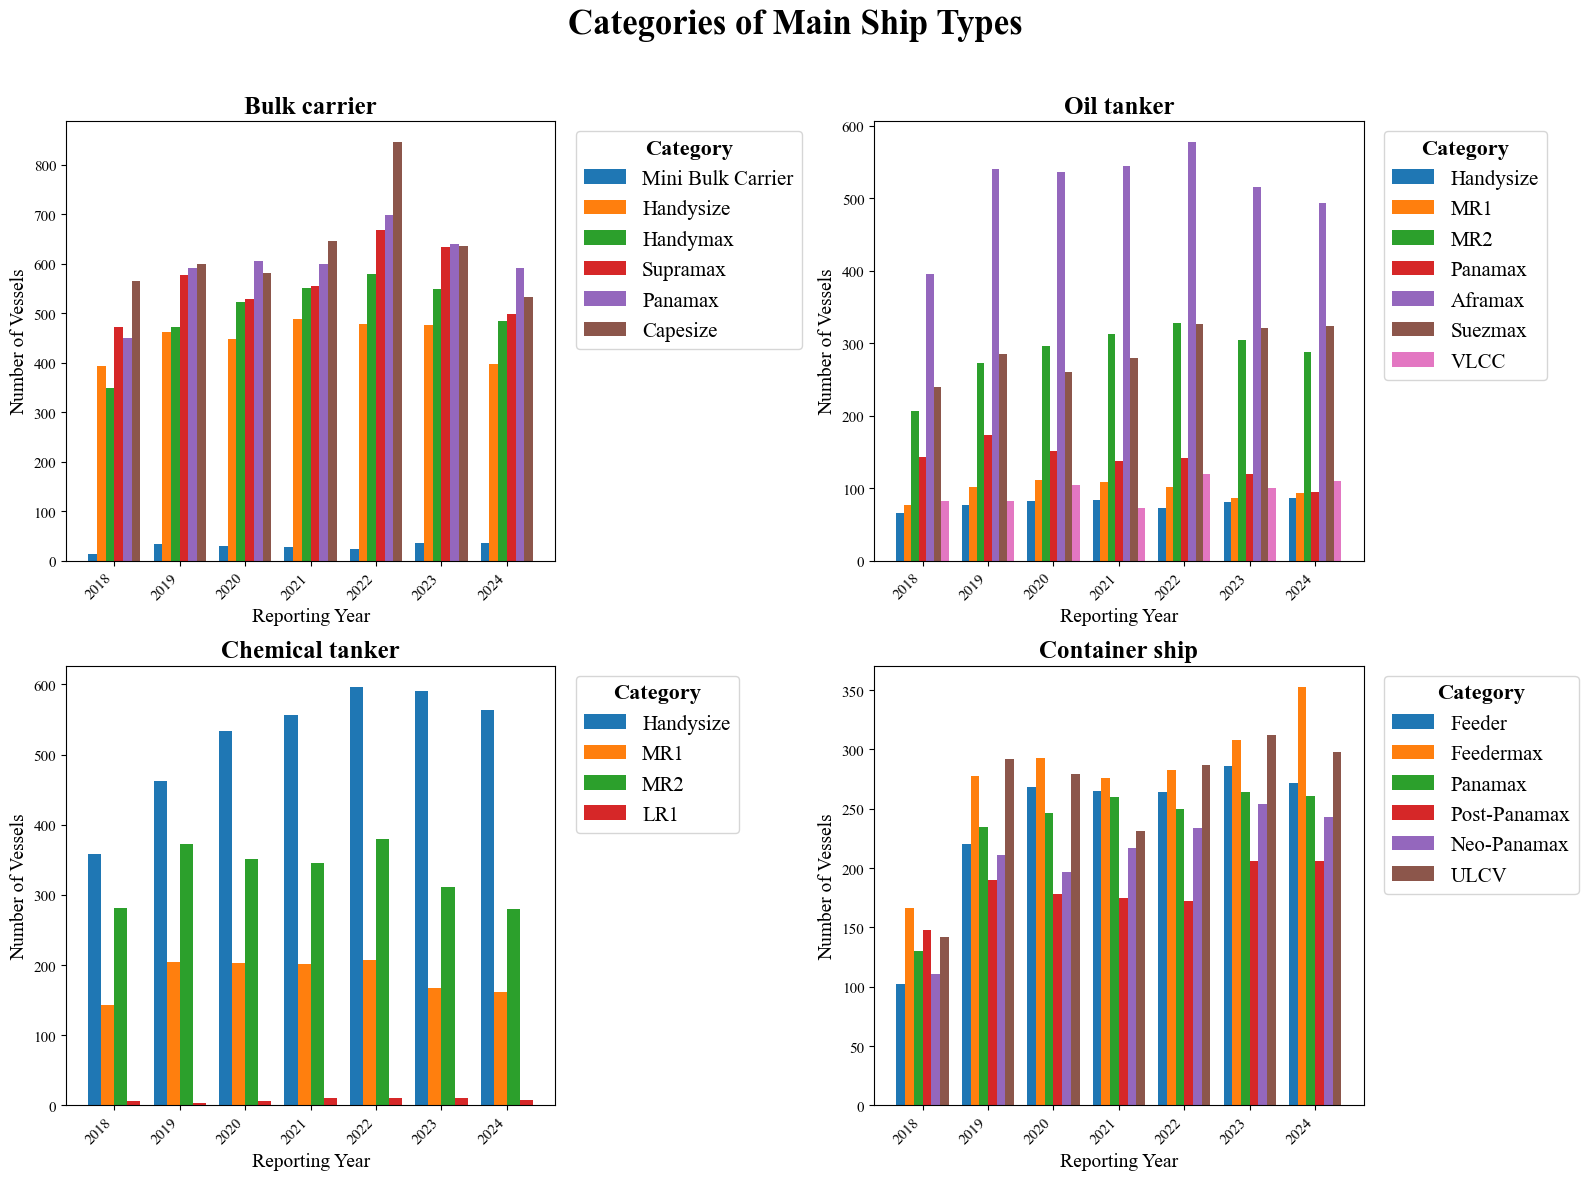

Saved SVG to: C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures\Panel_ship_categories_by_year.svg


In [26]:
#------Plot Bar Chart-----------------------------
import matplotlib.pyplot as plt
import numpy as np

# --- Generic filter function ---
def filter_small_categories(table, threshold=5):
    """Remove categories with total vessel count < threshold."""
    totals = table.sum(axis=1)
    keep = totals[totals >= threshold].index
    return table.loc[keep]

# Apply filtering to all ship types
bulk_table_filt = filter_small_categories(bulk_table, threshold=5)
oil_table_filt = filter_small_categories(oil_table, threshold=5)
chem_table_filt = filter_small_categories(chem_table, threshold=5)
cont_table_filt = filter_small_categories(cont_table, threshold=5)

# --- Plotting: 4 subplots (one per ship type) ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

tables = [
    ("Bulk carrier", bulk_table_filt),
    ("Oil tanker", oil_table_filt),
    ("Chemical tanker", chem_table_filt),
    ("Container ship", cont_table_filt)
]

for ax, (title, table) in zip(axes, tables):
    if table is None or table.shape[0] == 0 or table.shape[1] == 0:
        ax.text(0.5, 0.5, "No data", ha='center', va='center', fontsize=12)
        ax.set_title(title, fontsize=16, fontweight="bold")
        ax.set_xlabel("Reporting Year", fontsize=14)
        ax.set_ylabel("Number of Vessels", fontsize=14)
        continue

    years = list(table.columns.astype(str))
    categories = list(table.index)

    n_years = len(years)
    n_cat = len(categories)

    x = np.arange(n_years)
    total_group_width = 0.8
    bar_width = total_group_width / max(n_cat, 1)

    for i, cat in enumerate(categories):
        vals = table.loc[cat].reindex(table.columns, fill_value=0).values
        shift = (i - (n_cat - 1) / 2) * bar_width
        ax.bar(x + shift, vals, width=bar_width, label=cat)

    ax.set_xticks(x)
    ax.set_xticklabels(years, rotation=45, ha='right')
    ax.set_title(title, fontsize=18, fontweight="bold")
    ax.set_xlabel("Reporting Year", fontsize=14)
    ax.set_ylabel("Number of Vessels", fontsize=14)

    # Legend with bold title and larger font
    leg = ax.legend(
        title="Category", 
        bbox_to_anchor=(1.02, 1), 
        loc='upper left', 
        fontsize=15,             # <--- Increased font size here
        title_fontsize=16        # <--- Bold title with slightly larger size
    )
    plt.setp(leg.get_title(), fontweight="bold")

# Add a main title for the whole figure
fig.suptitle("Categories of Main Ship Types", fontsize=25, fontweight="bold", y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for main title

# Save to your folder
output_filename = r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures\Panel_ship_categories_by_year.svg"
fig.savefig(output_filename, format="svg", bbox_inches='tight')

plt.show()
print(f"Saved SVG to: {output_filename}")

# 7 Panel Regression Models

## 7.1 Check Stationarity (a) - Export to R

In [27]:
bulk_panel = panel_df[panel_df['Ship type'] == 'Bulk carrier'].copy()
bulk_panel = bulk_panel.drop(columns=["Name"])
bulk_panel = bulk_panel.drop(columns=["Ship type"])

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from scipy.stats import chi2

def fisher_panel_unit_root(df, entity_col, value_col, min_obs=3, eps=1e-12):
    """
    Fisher-type panel unit root test (Maddala & Wu, 1999).
    
    Parameters
    ----------
    df : DataFrame
        Panel dataset
    entity_col : str
        Column with cross-section ID (e.g. 'IMO Number')
    value_col : str
        Column with series values (e.g. 'CO2 Eff.')
    min_obs : int
        Minimum number of non-NA observations per entity
    eps : float
        Floor for p-values to avoid log(0)
        
    Returns
    -------
    dict with test statistic, p-value, and sample info
    """
    pvals = []
    
    for entity, group in df.groupby(entity_col):
        series = group[value_col].dropna()
        if len(series) >= min_obs and series.nunique() > 1:
            try:
                res = adfuller(series, maxlag=1, regression="c", autolag=None)  # drift + 1 lag
                p = max(res[1], eps)  # clip p-value
                pvals.append(p)
            except Exception:
                continue
    
    N = len(pvals)
    if N == 0:
        return {"Variable": value_col, "Chi2": np.nan, "df": np.nan,
                "p_value": np.nan, "N_used": 0}
    
    chi2_stat = -2 * np.sum(np.log(pvals))
    p_value = chi2.sf(chi2_stat, 2*N)
    
    return {"Variable": value_col,
            "Chi2": chi2_stat,
            "df": 2*N,
            "p_value": p_value,
            "N_used": N}

# === Example usage ===
variables = ["CO2 Eff.", "TEI", "Speed"]
results = []

for var in variables:
    results.append(fisher_panel_unit_root(bulk_panel, entity_col="IMO Number", value_col=var))

summary = pd.DataFrame(results)
print(summary)

   Variable         Chi2    df  p_value  N_used
0  CO2 Eff.  5085.848982  1198      0.0     599
1       TEI          NaN   852      NaN     426
2     Speed  7520.950786  1198      0.0     599


## 7.1 Check Stationarity (b)

In [28]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from scipy import stats

def ips_panel_adf(df, entity_col, value_col, min_obs=4):
    """
    Simple IPS-style panel ADF test (Im, Pesaran & Shin 2003).
    Computes the average of ADF tau-statistics across entities.
    """
    tau_list = []

    for entity, group in df.groupby(entity_col):
        series = group[value_col].dropna()
        if len(series) >= min_obs and series.nunique() > 1:
            try:
                result = adfuller(series, regression="c", autolag="AIC")
                tau_stat = result[0]   # ADF test statistic
                tau_list.append(tau_stat)
            except Exception:
                continue

    if not tau_list:
        return {"Variable": value_col, "Mean_tau": np.nan, "p_value": np.nan, "N_used": 0}

    tau_avg = np.mean(tau_list)
    N = len(tau_list)

    # Two-sided t-test (approximation)
    p_value = 2 * stats.t.sf(abs(tau_avg), df=N-1)

    return {"Variable": value_col, "Mean_tau": tau_avg, "p_value": p_value, "N_used": N}

# === Example Usage ===
variables = ["CO2 Eff.", "Speed"]
results = []

for var in variables:
    results.append(ips_panel_adf(panel_df, entity_col="IMO Number", value_col=var))

summary = pd.DataFrame(results)
print(summary)

   Variable  Mean_tau       p_value  N_used
0  CO2 Eff. -4.868724  1.152030e-06    5991
1     Speed -5.791758  7.319137e-09    5991


## 7.2 --- All 4 Categories Models ---

### 7.2.8 CRE Model with Dummy Years and Types and Interaction

In [29]:
# ---------- ORIGINA MODEL --------- #

import pandas as pd
from linearmodels.panel import RandomEffects
import numpy as np
from scipy.stats import chi2

df = panel_df.copy()
df.columns = (df.columns
                .str.strip()
                .str.replace(" ", "_")
                .str.replace(r"\.", "", regex=True))

# -----------------------------
# 1) MultiIndex: vessel × year
# -----------------------------
df_cre = df.set_index(['IMO_Number','Reporting_Period']).copy()

# -----------------------------
# 2) Mundlak means for time-varying vars
# -----------------------------
time_varying = ['Speed','Age']
means = df_cre.groupby(level=0)[time_varying].transform('mean').add_suffix('_mean')
df_cre = df_cre.join(means)

# -----------------------------
# 3) Year dummies
# -----------------------------
years = df_cre.index.get_level_values('Reporting_Period')
year_dummies = pd.get_dummies(years, prefix="year", drop_first=True)
year_dummies.index = df_cre.index
df_cre = df_cre.join(year_dummies)
year_terms = " + ".join(year_dummies.columns)

# -----------------------------
# 4) Ship-type dummies (baseline = Bulk carrier)
# -----------------------------
ship_dummies = pd.get_dummies(df_cre['Ship_type'], drop_first=True)

# sanitize column names
ship_dummies.columns = (ship_dummies.columns
                        .str.strip()
                        .str.replace(r'\s+', '_', regex=True)
                        .str.replace(r'\W+', '', regex=True))

ship_dummies.index = df_cre.index
df_cre = df_cre.join(ship_dummies)
ship_terms = " + ".join(ship_dummies.columns)

# -----------------------------
# 5) Interactions: Ship type × Year
# -----------------------------
interaction_terms = []
for ship in ship_dummies.columns:
    for year in year_dummies.columns:
        inter_name = f"{ship}_x_{year}"
        df_cre[inter_name] = df_cre[ship] * df_cre[year]
        interaction_terms.append(inter_name)

interaction_str = " + ".join(interaction_terms)

# -----------------------------
# 6) Build formula
# -----------------------------
formula = (
    "CO2_Eff ~ 1 + "
    "Speed + Age "                 # within-ship effects
    "+ Speed_mean + Age_mean "     # between-vessel averages
    "+ TEI + DWT "                 # time-invariant vessel-level regressors
    f"+ {year_terms} "             # year dummies
    f"+ {ship_terms} "             # ship-type dummies
    f"+ {interaction_str}"         # ship-type × year interactions
)

print("Using formula:\n", formula, "\n")

# -----------------------------
# 7) Fit CRE model
# -----------------------------
cre_model = RandomEffects.from_formula(formula, data=df_cre)
cre_res = cre_model.fit(cov_type="clustered", cluster_entity=True)
print(cre_res.summary)

# -----------------------------
# 8) Mundlak joint test (means)
# -----------------------------
mean_vars = ['Speed_mean','Age_mean']
beta = cre_res.params[mean_vars].values
V = cre_res.cov.loc[mean_vars, mean_vars].values
wald = float(beta.T @ np.linalg.inv(V) @ beta)
pval = chi2.sf(wald, len(mean_vars))
print("\nMundlak test χ²:", wald, " p-value:", pval)

Using formula:
 CO2_Eff ~ 1 + Speed + Age + Speed_mean + Age_mean + TEI + DWT + year_2019 + year_2020 + year_2021 + year_2022 + year_2023 + year_2024 + Chemical_tanker + Container_ship + Oil_tanker + Chemical_tanker_x_year_2019 + Chemical_tanker_x_year_2020 + Chemical_tanker_x_year_2021 + Chemical_tanker_x_year_2022 + Chemical_tanker_x_year_2023 + Chemical_tanker_x_year_2024 + Container_ship_x_year_2019 + Container_ship_x_year_2020 + Container_ship_x_year_2021 + Container_ship_x_year_2022 + Container_ship_x_year_2023 + Container_ship_x_year_2024 + Oil_tanker_x_year_2019 + Oil_tanker_x_year_2020 + Oil_tanker_x_year_2021 + Oil_tanker_x_year_2022 + Oil_tanker_x_year_2023 + Oil_tanker_x_year_2024 

                        RandomEffects Estimation Summary                        
Dep. Variable:                CO2_Eff   R-squared:                        0.4445
Estimator:              RandomEffects   R-squared (Between):              0.7119
No. Observations:               47047   R-squared (Wi

In [30]:
# --- VIF Diagnostics for Panel Model --- #

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1️⃣ Build the design matrix (X) from the same df_cre used in your regression
X = df_cre.copy().drop(columns=["CO2_Eff"], errors="ignore")

# Only keep numeric variables
X = X.select_dtypes(include=[np.number]).fillna(0)

# Add constant (intercept) for VIF calculation
X = sm.add_constant(X)

# 2️⃣ Compute VIF for all variables
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 3️⃣ Identify continuous vs. dummy variables
continuous_vars = ["Speed", "Age", "Speed_mean", "Age_mean", "TEI", "DWT"]  # edit if needed

def classify_var(name):
    if name in continuous_vars:
        return "Continuous"
    elif name == "const":
        return "Constant"
    else:
        return "Dummy/Interaction"

vif_data["Type"] = vif_data["feature"].apply(classify_var)

# 4️⃣ Sort by VIF and show top 10
vif_top10 = vif_data.sort_values("VIF", ascending=False).head(10)

print("\n📊 Top 10 Variables by VIF:\n")
print(vif_top10.to_string(index=False))

# Optional: export full VIF table
vif_data_sorted = vif_data.sort_values("VIF", ascending=False)
vif_data_sorted.to_csv("vif_results.csv", index=False)
print("\n✅ Full VIF table saved as 'vif_results.csv'")


📊 Top 10 Variables by VIF:

   feature       VIF       Type
     const 55.122053   Constant
  Age_mean 13.551200 Continuous
       Age 12.944526 Continuous
Speed_mean  3.734534 Continuous
     Speed  3.378146 Continuous
       TEI  1.844841 Continuous
       DWT  1.275413 Continuous

✅ Full VIF table saved as 'vif_results.csv'


                        RandomEffects Estimation Summary                        
Dep. Variable:                CO2_Eff   R-squared:                        0.4454
Estimator:              RandomEffects   R-squared (Between):              0.7115
No. Observations:               47047   R-squared (Within):              -0.0431
Date:                Fri, Oct 24 2025   R-squared (Overall):              0.6703
Time:                        14:49:49   Log-likelihood                -1.376e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1078.6
Entities:                       14429   P-value                           0.0000
Avg Obs:                       3.2606   Distribution:                F(35,47011)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             428.98
                            

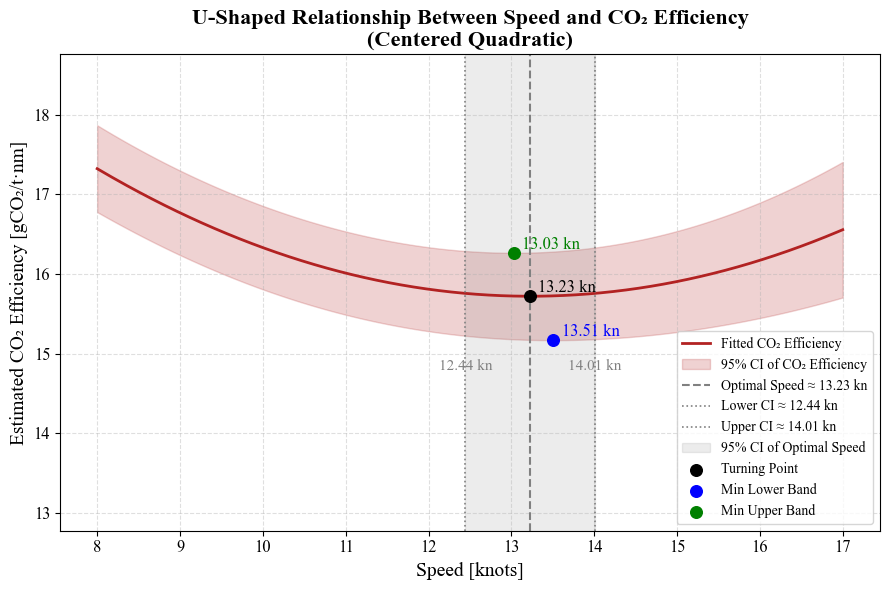

✅ Figure saved successfully to: C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures\speed_curves.svg


In [31]:
#--- SPEED SQUARE AND CENTERED -------#
# --- further caluclations on SE of Speed ------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from linearmodels.panel import RandomEffects

# === 1. Prepare panel data ===
df = panel_df.copy()
df.columns = (df.columns
              .str.strip()
              .str.replace(" ", "_")
              .str.replace(r"\.", "", regex=True))
df_cre = df.set_index(['IMO_Number', 'Reporting_Period']).copy()

# === 2. Mundlak means for time-varying vars ===
time_varying = ['Speed', 'Age']
means = df_cre.groupby(level=0)[time_varying].transform('mean').add_suffix('_mean')
df_cre = df_cre.join(means)

# === 3. Center speed and create squared term ===
mean_speed = df_cre['Speed'].mean()
df_cre['Speed_c'] = df_cre['Speed'] - mean_speed
df_cre['Speed_c_sq'] = df_cre['Speed_c'] ** 2

# Add between-vessel averages (Mundlak)
df_cre['Speed_c_mean'] = df_cre.groupby(level=0)['Speed_c'].transform('mean')
df_cre['Speed_c_sq_mean'] = df_cre.groupby(level=0)['Speed_c_sq'].transform('mean')

# === 4. Year dummies ===
years = df_cre.index.get_level_values('Reporting_Period')
year_dummies = pd.get_dummies(years, prefix="year", drop_first=True)
year_dummies.index = df_cre.index
df_cre = df_cre.join(year_dummies)
year_terms = " + ".join(year_dummies.columns)

# === 5. Ship-type dummies ===
ship_dummies = pd.get_dummies(df_cre['Ship_type'], drop_first=True)
ship_dummies.columns = (ship_dummies.columns
                        .str.strip()
                        .str.replace(r'\s+', '_', regex=True)
                        .str.replace(r'\W+', '', regex=True))
ship_dummies.index = df_cre.index
df_cre = df_cre.join(ship_dummies)
ship_terms = " + ".join(ship_dummies.columns)

# === 6. Interaction terms ===
interaction_terms = []
for ship in ship_dummies.columns:
    for year in year_dummies.columns:
        inter_name = f"{ship}_x_{year}"
        df_cre[inter_name] = df_cre[ship] * df_cre[year]
        interaction_terms.append(inter_name)
interaction_str = " + ".join(interaction_terms)

# === 7. Build and fit CRE model ===
formula = (
    "CO2_Eff ~ 1 + "
    "Speed_c + Speed_c_sq + Age "
    "+ Speed_c_mean + Speed_c_sq_mean + Age_mean "
    "+ TEI + DWT "
    f"+ {year_terms} + {ship_terms} + {interaction_str}"
)

cre_model = RandomEffects.from_formula(formula, data=df_cre)
cre_res = cre_model.fit(cov_type="clustered", cluster_entity=True)
print(cre_res.summary)

# === 8. Compute turning point and its 95% CI (delta method) ===
b1 = cre_res.params['Speed_c']
b2 = cre_res.params['Speed_c_sq']
cov_b1b2 = cre_res.cov.loc['Speed_c', 'Speed_c_sq']
var_b1 = cre_res.cov.loc['Speed_c', 'Speed_c']
var_b2 = cre_res.cov.loc['Speed_c_sq', 'Speed_c_sq']

# Turning point
speed_star = -b1 / (2 * b2) + mean_speed

# Delta method variance
d_b1 = -1 / (2 * b2)
d_b2 = b1 / (2 * (b2 ** 2))
var_speed_star = (d_b1 ** 2) * var_b1 + (d_b2 ** 2) * var_b2 + 2 * d_b1 * d_b2 * cov_b1b2
se_speed_star = np.sqrt(var_speed_star)

# 95% CI for turning point
ci_lower = float(speed_star - 1.96 * se_speed_star)
ci_upper = float(speed_star + 1.96 * se_speed_star)

print(f"Turning point: {speed_star:.2f} kn")
print(f"95% CI for turning point: [{ci_lower:.2f}, {ci_upper:.2f}] kn")

# 1) Overall mean of continuous variables
controls = ['Age', 'Speed_c_mean', 'Speed_c_sq_mean', 'Age_mean', 'TEI', 'DWT']
C_controls = sum(cre_res.params[v] * df_cre[v].mean() for v in controls if v in cre_res.params.index)

# 2) Mean of year effects
year_coef_names = [c for c in cre_res.params.index if c.startswith('year_')]
C_year = float(np.mean(cre_res.params[year_coef_names])) if year_coef_names else 0.0

# 3) Mean of ship-type effects
ship_coef_names = [c for c in ship_dummies.columns if c in cre_res.params.index]
C_ship = float(np.mean(cre_res.params[ship_coef_names])) if ship_coef_names else 0.0

# Final constant shift (no interaction effects)
C = C_controls + C_year + C_ship

# === 9. Build prediction curve and confidence bands ===
speeds = np.linspace(8, 17, 300)
sc = speeds - mean_speed

mu = (cre_res.params['Intercept'] +
      cre_res.params['Speed_c'] * sc +
      cre_res.params['Speed_c_sq'] * sc**2
     +C)

# Covariance matrix for prediction
cov = cre_res.cov.loc[['Intercept', 'Speed_c', 'Speed_c_sq'],
                      ['Intercept', 'Speed_c', 'Speed_c_sq']].values
X = np.vstack([np.ones_like(sc), sc, sc**2]).T
se = np.sqrt(np.sum(X @ cov * X, axis=1))

upper = mu + 1.96 * se
lower = mu - 1.96 * se

# Minima of upper/lower bands
idx_lo = np.argmin(lower)
idx_hi = np.argmin(upper)
x_lo, x_hi = speeds[idx_lo], speeds[idx_hi]
print(f"Argmin of lower band: {x_lo:.2f} kn")
print(f"Argmin of upper band: {x_hi:.2f} kn")

import matplotlib as mpl
import os

# --- Global font: Times New Roman ---
mpl.rcParams['font.family'] = 'Times New Roman'

# === 10. Plot results ===
fig, ax = plt.subplots(figsize=(9, 6))

# Prediction curve and confidence band
ax.plot(speeds, mu, color="firebrick", linewidth=2, label="Fitted CO₂ Efficiency")
ax.fill_between(speeds, lower, upper, color="firebrick", alpha=0.2, label="95% CI of CO₂ Efficiency")

# Vertical line at turning point
ax.axvline(speed_star, color="gray", linestyle="--", linewidth=1.5, label=f"Optimal Speed ≈ {speed_star:.2f} kn")

# ✅ New: vertical lines for CI boundaries
ax.axvline(ci_lower, color="gray", linestyle=":", linewidth=1.2, label=f"Lower CI ≈ {ci_lower:.2f} kn")
ax.axvline(ci_upper, color="gray", linestyle=":", linewidth=1.2, label=f"Upper CI ≈ {ci_upper:.2f} kn")

# Shaded region showing turning point CI
ax.axvspan(ci_lower, ci_upper, color="gray", alpha=0.15, label="95% CI of Optimal Speed")

# Annotate turning point (mean curve)
eff_star = (cre_res.params['Intercept'] +
            cre_res.params['Speed_c'] * (speed_star - mean_speed) +
            cre_res.params['Speed_c_sq'] * (speed_star - mean_speed)**2 + C)
ax.scatter(speed_star, eff_star, color="black", s=70, zorder=5, label="Turning Point")
ax.text(speed_star + 0.1, eff_star, f"{speed_star:.2f} kn", fontsize=12, va="bottom")

# === NEW: Show minima of upper and lower bands ===
eff_lo = lower[idx_lo]
eff_hi = upper[idx_hi]
ax.scatter(x_lo, eff_lo, color="blue", s=70, zorder=5, marker='o', label="Min Lower Band")
ax.scatter(x_hi, eff_hi, color="green", s=70, zorder=5, marker='o', label="Min Upper Band")

# Annotate them
ax.text(x_lo + 0.1, eff_lo, f"{x_lo:.2f} kn", fontsize=12, color="blue", va="bottom")
ax.text(x_hi + 0.1, eff_hi, f"{x_hi:.2f} kn", fontsize=12, color="green", va="bottom")

# === Annotate CI bounds on x-axis ===
y_min_for_text = ax.get_ylim()[0] - 0.1  # just below x-axis
ax.text(ci_lower, y_min_for_text, f"{ci_lower:.2f} kn", fontsize=11, ha="center", va="top", color="gray")
ax.text(ci_upper, y_min_for_text, f"{ci_upper:.2f} kn", fontsize=11, ha="center", va="top", color="gray")

# === X-axis improvements ===
ax.set_xticks(np.arange(8, 18, 1))  # tick every 1 knot
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Labels and aesthetics
ax.set_xlabel("Speed [knots]", fontsize=14)
ax.set_ylabel("Estimated CO₂ Efficiency [gCO₂/t·nm]", fontsize=14)
ax.set_title("U-Shaped Relationship Between Speed and CO₂ Efficiency\n(Centered Quadratic)", fontsize=16, fontweight="bold")

# ✅ Start y-axis from 3
ymax = np.max(upper) * 1.05  # small padding above
ax.set_ylim(2+C, ymax)

ax.grid(True, linestyle="--", alpha=0.4)

# Legend inside top-right
ax.legend(loc='lower right', fontsize=10, frameon=True)

plt.tight_layout()

# === Save figure ===
save_path = r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures\speed_curves.svg"
plt.savefig(save_path, format="svg", bbox_inches="tight")

plt.show()

print(f"✅ Figure saved successfully to: {save_path}")

In [32]:
# --- FUNCTION FOR EXPORTING TABLES ----#
import pandas as pd

def export_cre_results(model_result, model_name, save_dir=None):
    """
    Extracts, cleans, and exports RandomEffects model results
    into a thesis-style regression table (like your screenshots).

    Parameters
    ----------
    model_result : linearmodels RandomEffectsResults
        The fitted model result object (e.g., cre_res)
    model_name : str
        Short name for the model (used for filename and sheet name)
    save_dir : str, optional
        Directory to save the Excel file (if None, table only prints)
    """

    # === Extract basic results ===
    df = pd.DataFrame({
        "Variable": model_result.params.index,
        "Estimate": model_result.params.values,
        "Std. Err.": model_result.std_errors.values,
        "t-stat": model_result.tstats.values,
        "p-value": model_result.pvalues.values,
        "95% CI (Lower)": model_result.conf_int().iloc[:, 0].values,
        "95% CI (Upper)": model_result.conf_int().iloc[:, 1].values
    })

    # === Clean up variable names ===
    df["Variable"] = (
        df["Variable"]
        .replace({
            "Speed_c_sq": "(Speed_c)²",
            "log_Speed": "ln(Speed)",
            "log_CO2_Eff": "ln(CO₂ Efficiency)",
        })
    )

    # === Filter out intercepts and interaction terms ===
    df = df[~df["Variable"].str.contains("Intercept|_x_")].reset_index(drop=True)

    # === Formatting ===
    df["Estimate"] = df["Estimate"].round(4)
    df["Std. Err."] = df["Std. Err."].round(4)
    df["t-stat"] = df["t-stat"].round(4)
    df["95% CI (Lower)"] = df["95% CI (Lower)"].round(4)
    df["95% CI (Upper)"] = df["95% CI (Upper)"].round(4)
    df["p-value"] = df["p-value"].apply(lambda p: "<0.001" if p < 0.001 else round(p, 4))

    # === Display formatted table ===
    print(f"\n=== Formatted Results: {model_name} ===")
    print(df.to_string(index=False))

    # === Optional: export to Excel ===
    if save_dir:
        save_path = f"{save_dir}/{model_name}_results.xlsx"
        df.to_excel(save_path, index=False)
        print(f"\n✅ Table saved to: {save_path}")

    return df

In [33]:
# -- export results --- #
save_dir = r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Tables"

table = export_cre_results(cre_res, "Full_Model_Speed", save_dir)


=== Formatted Results: Full_Model_Speed ===
       Variable  Estimate  Std. Err.   t-stat p-value  95% CI (Lower)  95% CI (Upper)
        Speed_c   -0.2342     0.0276  -8.4958  <0.001         -0.2883         -0.1802
     (Speed_c)²    0.0587     0.0068   8.5843  <0.001          0.0453          0.0721
            Age   -0.1421     0.0409  -3.4763  <0.001         -0.2222         -0.0620
   Speed_c_mean   -1.1851     0.0559 -21.2158  <0.001         -1.2946         -1.0756
Speed_c_sq_mean   -0.0954     0.0150  -6.3620  <0.001         -0.1248         -0.0660
       Age_mean    0.1949     0.0424   4.5908  <0.001          0.1117          0.2781
            TEI    1.0391     0.0317  32.7698  <0.001          0.9770          1.1013
            DWT   -0.0000     0.0000 -31.5078  <0.001         -0.0000         -0.0000
      year_2019   -0.1162     0.0895  -1.2992  0.1939         -0.2916          0.0591
      year_2020    0.2782     0.1085   2.5646  0.0103          0.0656          0.4907
      yea

                        RandomEffects Estimation Summary                        
Dep. Variable:            log_CO2_Eff   R-squared:                        0.6561
Estimator:              RandomEffects   R-squared (Between):              0.8179
No. Observations:               47047   R-squared (Within):               0.0198
Date:                Fri, Oct 24 2025   R-squared (Overall):              0.7525
Time:                        14:49:53   Log-likelihood                   -2512.4
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2638.1
Entities:                       14429   P-value                           0.0000
Avg Obs:                       3.2606   Distribution:                F(34,47012)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             2157.1
                            

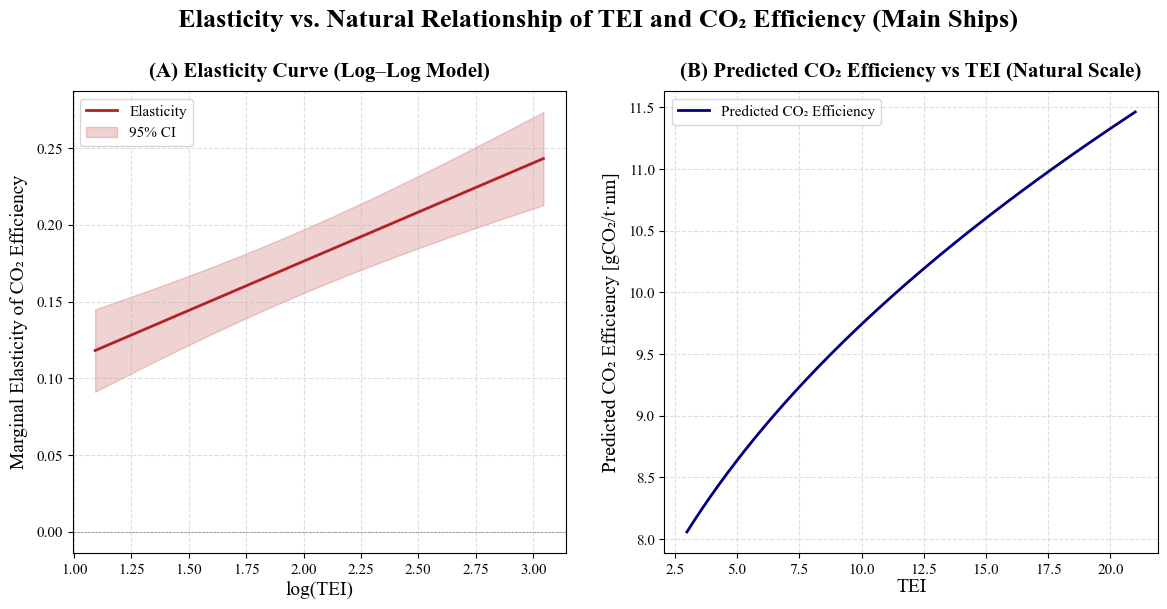

✅ Figure saved successfully to: C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures\tei_elasticity_vs_levels_all_fixed.svg


In [34]:
# --- Quadratic log(TEI) model with CRE and dual visualization (all ship types, realistic predictions) --- #

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from linearmodels.panel import RandomEffects
from scipy.stats import chi2

# === 1. Prepare panel data ===
df = panel_df.copy()
df.columns = (
    df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace(r"\.", "", regex=True)
)
df_cre = df.set_index(['IMO_Number', 'Reporting_Period']).copy()

# === 2. Log-transform variables ===
df_cre['log_CO2_Eff'] = np.log(df_cre['CO2_Eff'])
df_cre['log_Speed'] = np.log(df_cre['Speed'])
df_cre['log_TEI'] = np.log(df_cre['TEI'])
df_cre['log_DWT'] = np.log(df_cre['DWT'])

# === 3. Mundlak means ===
time_varying_log = ['log_Speed', 'Age']
means_log = df_cre.groupby(level=0)[time_varying_log].transform('mean').add_suffix('_mean')
df_cre = df_cre.join(means_log)

# === 4. Quadratic term ===
df_cre['log_TEI_sq'] = df_cre['log_TEI'] ** 2

# === 5. Year dummies ===
years = df_cre.index.get_level_values('Reporting_Period')
year_dummies = pd.get_dummies(years, prefix="year", drop_first=True)
year_dummies.index = df_cre.index
df_cre = df_cre.join(year_dummies)
year_terms = " + ".join(year_dummies.columns)

# === 6. Ship-type dummies ===
ship_dummies = pd.get_dummies(df_cre['Ship_type'], drop_first=True)
ship_dummies.columns = (
    ship_dummies.columns
    .str.strip()
    .str.replace(r'\s+', '_', regex=True)
    .str.replace(r'\W+', '', regex=True)
)
ship_dummies.index = df_cre.index
df_cre = df_cre.join(ship_dummies)
ship_terms = " + ".join(ship_dummies.columns)

# === 7. Interactions ===
interaction_terms = []
for ship in ship_dummies.columns:
    for year in year_dummies.columns:
        inter_name = f"{ship}_x_{year}"
        df_cre[inter_name] = df_cre[ship] * df_cre[year]
        interaction_terms.append(inter_name)
interaction_str = " + ".join(interaction_terms)

# === 8. Fit the CRE model ===
formula_nl = (
    "log_CO2_Eff ~ 1 + "
    "log_Speed + Age + log_TEI + log_TEI_sq + log_DWT "
    "+ log_Speed_mean + Age_mean "
    f"+ {year_terms} + {ship_terms} + {interaction_str}"
)
cre_model_nl = RandomEffects.from_formula(formula_nl, data=df_cre)
cre_res_nl = cre_model_nl.fit(cov_type="clustered", cluster_entity=True)
print(cre_res_nl.summary)

# === 9. Extract coefficients ===
params = cre_res_nl.params
b0 = params['Intercept']
b1 = params['log_TEI']
b2 = params['log_TEI_sq']

# === 10. Compute means for other variables ===
mean_log_speed = df_cre['log_Speed'].mean()
mean_age = df_cre['Age'].mean()
mean_log_dwt = df_cre['log_DWT'].mean()
mean_log_speed_mean = df_cre['log_Speed_mean'].mean()
mean_age_mean = df_cre['Age_mean'].mean()

# === 11. Define TEI range ===
log_tei_range = np.linspace(df_cre['log_TEI'].quantile(0.05), df_cre['log_TEI'].quantile(0.95), 200)
tei_range = np.exp(log_tei_range)

# === 12. Marginal elasticity ===
var_b1 = cre_res_nl.cov.loc['log_TEI', 'log_TEI']
var_b2 = cre_res_nl.cov.loc['log_TEI_sq', 'log_TEI_sq']
cov_b1b2 = cre_res_nl.cov.loc['log_TEI', 'log_TEI_sq']

elasticity = b1 + 2 * b2 * log_tei_range
se_elasticity = np.sqrt(
    var_b1 + (2 * log_tei_range) ** 2 * var_b2 + 2 * (2 * log_tei_range) * cov_b1b2
)
upper_el = elasticity + 1.96 * se_elasticity
lower_el = elasticity - 1.96 * se_elasticity

# === 13. Predict CO₂ efficiency (holding other vars at means) ===
log_pred = (
    b0
    + b1 * log_tei_range
    + b2 * log_tei_range ** 2
    + params['log_Speed'] * mean_log_speed
    + params['Age'] * mean_age
    + params['log_DWT'] * mean_log_dwt
    + params['log_Speed_mean'] * mean_log_speed_mean
    + params['Age_mean'] * mean_age_mean
)
predicted_eff = np.exp(log_pred)

# === 14. Plot both subplots ===
mpl.rcParams['font.family'] = 'Times New Roman'
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- (A) Elasticity ---
axes[0].plot(log_tei_range, elasticity, color="firebrick", linewidth=2, label="Elasticity")
axes[0].fill_between(log_tei_range, lower_el, upper_el, color="firebrick", alpha=0.2, label="95% CI")
axes[0].axhline(0, color='gray', linestyle='--', linewidth=0.5)
axes[0].set_xlabel("log(TEI)", fontsize=14, labelpad=3)  # ↓ label closer
axes[0].set_ylabel("Marginal Elasticity of CO₂ Efficiency", fontsize=14, labelpad=6)  # ↓ closer
axes[0].set_title("(A) Elasticity Curve (Log–Log Model)", fontsize=15, fontweight="bold", pad=10)
axes[0].grid(True, linestyle="--", alpha=0.4)
axes[0].legend(fontsize=11, loc='best')

# --- (B) Natural Scale Predictions ---
axes[1].plot(tei_range, predicted_eff, color="navy", linewidth=2, label="Predicted CO₂ Efficiency")
axes[1].set_xlabel("TEI", fontsize=14, labelpad=1)  # ↓ closer
axes[1].set_ylabel("Predicted CO₂ Efficiency [gCO₂/t·nm]", fontsize=14, labelpad=6)
axes[1].set_title("(B) Predicted CO₂ Efficiency vs TEI (Natural Scale)", fontsize=15, fontweight="bold", pad=10)
axes[1].grid(True, linestyle="--", alpha=0.4)
axes[1].legend(fontsize=11, loc='best')

plt.suptitle(
    "Elasticity vs. Natural Relationship of TEI and CO₂ Efficiency (Main Ships)",
    fontsize=19,
    fontweight="bold",
    y=1.015  # ↓ Moves the title closer to the subplots (default is ≈ 0.98–0.99)
)

# === 15. Save figure ===
save_path = r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures\tei_elasticity_vs_levels_all_fixed.svg"
plt.savefig(save_path, format="svg", bbox_inches="tight")
plt.show()

print(f"✅ Figure saved successfully to: {save_path}")

In [35]:
#export results
table = export_cre_results(cre_res_nl, "All_Model_Log", save_dir)


=== Formatted Results: All_Model_Log ===
       Variable  Estimate  Std. Err.   t-stat p-value  95% CI (Lower)  95% CI (Upper)
      ln(Speed)   -0.2466     0.0129 -19.0934  <0.001         -0.2719         -0.2213
            Age    0.0078     0.0018   4.2328  <0.001          0.0042          0.0113
        log_TEI    0.0482     0.0226   2.1352  0.0328          0.0040          0.0924
     log_TEI_sq    0.0320     0.0051   6.2311  <0.001          0.0219          0.0421
        log_DWT   -0.4706     0.0055 -85.4619  <0.001         -0.4814         -0.4598
 log_Speed_mean   -0.2254     0.0229  -9.8446  <0.001         -0.2703         -0.1805
       Age_mean    0.0032     0.0019   1.7166  0.0861         -0.0005          0.0069
      year_2019   -0.0296     0.0077  -3.8470  <0.001         -0.0447         -0.0145
      year_2020   -0.0281     0.0080  -3.4902  <0.001         -0.0438         -0.0123
      year_2021    0.0143     0.0087   1.6442  0.1001         -0.0028          0.0314
      year_2

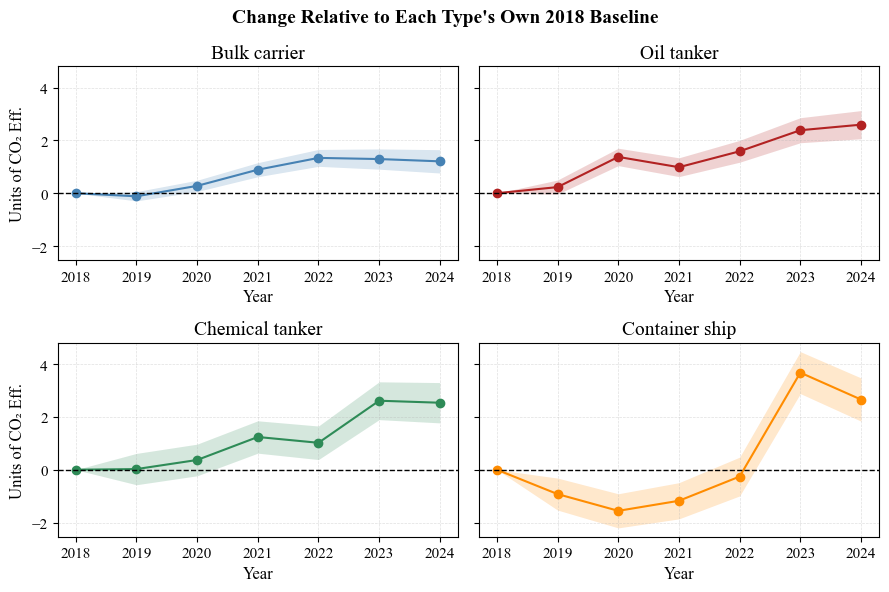

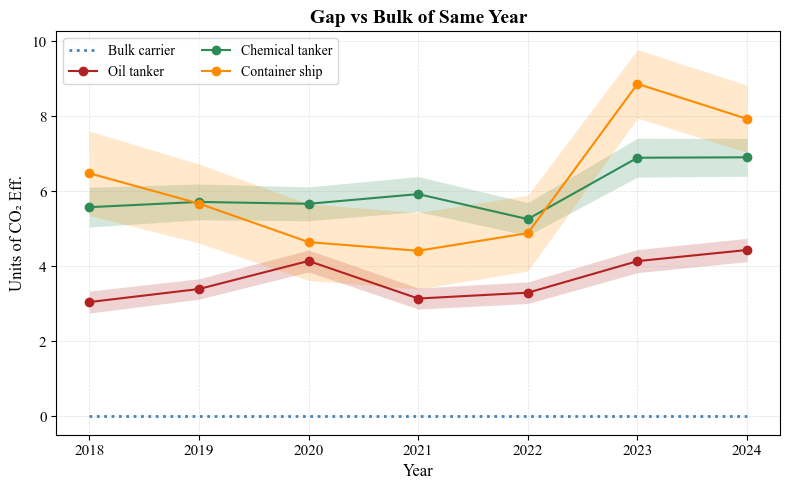

In [36]:
# --- plotting interactions Main Types ----#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Folder to save ===
fig_dir = r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures"

# ----- Inputs from your fitted model -----
params = cre_res.params
cov    = cre_res.cov

# ===== COMMON SETUP =====
year_cols = [c for c in params.index if c.startswith("year_")]
years = [2018] + sorted(int(c.split("_")[1]) for c in year_cols)

color_map = {
    "Bulk carrier": "steelblue",
    "Oil tanker": "firebrick",
    "Chemical tanker": "seagreen",
    "Container ship": "darkorange",
}

display_to_sanitized = {
    "Bulk carrier": "Bulk_carrier",   # baseline (no dummy)
    "Oil tanker": "Oil_tanker",
    "Chemical tanker": "Chemical_tanker",
    "Container ship": "Container_ship",
}
sanitized_to_display = {v: k for k, v in display_to_sanitized.items()}

panel_order = ["Bulk carrier", "Oil tanker", "Chemical tanker", "Container ship"]
legend_order = panel_order

# ----- Helper: linear combination -----
def lincomb(varnames):
    a = np.zeros(len(params))
    any_hit = False
    for v in varnames:
        if v in params.index:
            a[params.index.get_loc(v)] += 1.0
            any_hit = True
    est = float(a @ params.values) if any_hit else 0.0
    se  = float(np.sqrt(a @ cov.values @ a)) if any_hit else 0.0
    return est, se

# =========================================================
# FIGURE 1: Within-type change relative to own 2018 baseline
# =========================================================
def build_series_for_category(display_name):
    san = display_to_sanitized[display_name]
    rows = []
    for y in years:
        if display_name == "Bulk carrier":
            # Δ_t = λ_t
            est, se = (0.0, 0.0) if y == 2018 else lincomb([f"year_{y}"])
        else:
            # Δ_t = λ_t + ψ_{c,t}
            if y == 2018:
                est, se = 0.0, 0.0
            else:
                terms = [f"year_{y}"]
                inter = f"{san}_x_year_{y}"
                if inter in params.index:
                    terms.append(inter)
                est, se = lincomb(terms)
        rows.append({"Year": y, "Estimate": est, "SE": se})
    df = pd.DataFrame(rows)
    df["lo"] = df["Estimate"] - 1.96 * df["SE"]
    df["hi"] = df["Estimate"] + 1.96 * df["SE"]
    return df

fig, axes = plt.subplots(2, 2, figsize=(9, 6), sharey=True)
axes = axes.ravel()

for ax, disp in zip(axes, panel_order):
    dfp = build_series_for_category(disp)
    ax.plot(dfp["Year"], dfp["Estimate"], marker="o", color=color_map[disp], label=disp)
    ax.fill_between(dfp["Year"], dfp["lo"], dfp["hi"], alpha=0.20, linewidth=0, color=color_map[disp])
    ax.axhline(0, linestyle="--", linewidth=1, color="k")
    ax.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.4)  # subtle grid
    ax.set_title(disp, fontsize=14, fontweight="normal")  # <-- not bold
    ax.set_xlabel("Year", fontsize=12)

axes[0].set_ylabel("Units of CO₂ Eff.", fontsize=12)
axes[2].set_ylabel("Units of CO₂ Eff.", fontsize=12)
fig.suptitle("Change Relative to Each Type's Own 2018 Baseline", fontsize=14, fontweight="bold")
plt.tight_layout()

save_path = os.path.join(fig_dir, "interaction_main_types_Fig1.svg")
plt.savefig(save_path, format="svg", bbox_inches="tight")  # ✅ vector + raster mix

plt.show()

# =========================================================
# FIGURE 2: Cross-type gap vs Bulk carrier (same year)
# =========================================================

# Build Δ_{c,t} = φ_c + ψ_{c,t}
rows = []
for cat in ["Oil_tanker", "Chemical_tanker", "Container_ship"]:
    for y in years:
        terms = [cat]  # φ_c
        inter = f"{cat}_x_year_{y}"
        if y != 2018 and inter in params.index:
            terms.append(inter)
        est, se = lincomb(terms)
        rows.append({
            "CategorySan": cat,
            "CategoryDisp": sanitized_to_display.get(cat, cat),
            "Year": y,
            "Estimate": est,
            "SE": se,
            "lo": est - 1.96 * se,
            "hi": est + 1.96 * se
        })

df_gap = pd.DataFrame(rows)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

for disp_name in ["Oil tanker", "Chemical tanker", "Container ship"]:
    san = display_to_sanitized.get(disp_name, disp_name)
    g = df_gap[df_gap["CategorySan"] == san].sort_values("Year")
    if g.empty:
        continue
    ax.plot(g["Year"], g["Estimate"], marker="o", label=disp_name, color=color_map[disp_name])
    ax.fill_between(g["Year"], g["lo"], g["hi"], alpha=0.20, linewidth=0, color=color_map[disp_name])

# Dotted zero reference line for Bulk carrier (no horizontal dashed line)
ax.plot(years, [0]*len(years), linestyle=":", linewidth=2, color=color_map["Bulk carrier"], label="Bulk carrier")

# Removed ax.axhline(0, ...) line here
ax.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.4)  # subtle grid
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Units of CO₂ Eff.", fontsize=12)
ax.set_title("Gap vs Bulk of Same Year", fontsize=14, fontweight="bold")

# Clean legend order
handles, labels = ax.get_legend_handles_labels()
lab2hdl = {lab: h for h, lab in zip(handles, labels)}
ordered_labels  = [lab for lab in legend_order if lab in lab2hdl]
ordered_handles = [lab2hdl[lab] for lab in ordered_labels]
ax.legend(ordered_handles, ordered_labels, ncol=2)

save_path = os.path.join(fig_dir, "interaction_main_types_Fig2.svg")
plt.savefig(save_path, format="svg", bbox_inches="tight")  # ✅ vector + raster mix

plt.tight_layout()
plt.show()

In [37]:
#---EXPORT TABLES---#

import numpy as np
import pandas as pd

# === Extract coefficients ===
params = cre_res.params

# Identify year dummies, ship-type dummies, and interactions
year_cols = [c for c in params.index if c.startswith("year_")]
ship_cols = [c for c in params.index if (c not in year_cols and "_x_" not in c 
             and c not in ["Intercept","Speed","Age","Speed_mean","Age_mean","TEI","DWT"])]
interaction_cols = [c for c in params.index if "_x_" in c]

# --- Parse into dicts ---
# Year effects (baseline 2018 = 0)
year_effects = {2018: 0.0}
for c in year_cols:
    yr = int(c.split("_")[1])
    year_effects[yr] = params[c]

# Ship-type dummies
ship_dummies = {c: params[c] for c in ship_cols}

# Interactions
interactions = {}
for c in interaction_cols:
    ship, yr = c.split("_x_")
    yr = int(yr.split("_")[1])
    if ship not in interactions:
        interactions[ship] = {}
    interactions[ship][yr] = params[c]

# Ensure order
years = sorted(year_effects.keys())
ships = ["Bulk_Carrier"] + list(ship_dummies.keys())

# === Table 1: Evolution vs own 2018 baseline ===
data_evolution = {}
for ship in ships:
    vals = []
    for y in years:
        if ship == "Bulk_Carrier":
            val = year_effects[y]   # Bulk Carrier evolution vs 2018
        else:
            base = year_effects[y]
            inter = interactions.get(ship, {}).get(y, 0.0)
            val = base + inter      # relative to own 2018
        vals.append(round(val, 4))
    data_evolution[ship] = vals

df_evolution = pd.DataFrame(data_evolution, index=years)

# === Table 2: Comparison vs Bulk Carrier 2018 baseline ===
# Bulk Carrier 2018 = 0 by construction
data_vs_bulk2018 = {}
for ship in ships:
    vals = []
    for y in years:
        if ship == "Bulk_Carrier":
            val = year_effects[y]  # Bulk Carrier vs 2018
        else:
            ship_val = ship_dummies[ship]
            year_val = year_effects[y]
            inter_val = interactions.get(ship, {}).get(y, 0.0)
            val = ship_val + year_val + inter_val
        vals.append(round(val, 4))
    data_vs_bulk2018[ship] = vals

df_vs_bulk2018 = pd.DataFrame(data_vs_bulk2018, index=years)

# === Show results ===
print("\n=== Table 1: Evolution vs own 2018 baseline ===")
print(df_evolution)

print("\n=== Table 2: Comparison vs Bulk Carrier 2018 baseline ===")
print(df_vs_bulk2018)


=== Table 1: Evolution vs own 2018 baseline ===
      Bulk_Carrier  Speed_c  Speed_c_sq  Speed_c_mean  Speed_c_sq_mean  \
2018        0.0000   0.0000      0.0000        0.0000           0.0000   
2019       -0.1162  -0.1162     -0.1162       -0.1162          -0.1162   
2020        0.2782   0.2782      0.2782        0.2782           0.2782   
2021        0.8904   0.8904      0.8904        0.8904           0.8904   
2022        1.3370   1.3370      1.3370        1.3370           1.3370   
2023        1.2932   1.2932      1.2932        1.2932           1.2932   
2024        1.2065   1.2065      1.2065        1.2065           1.2065   

      Chemical_tanker  Container_ship  Oil_tanker  
2018           0.0000          0.0000      0.0000  
2019           0.0241         -0.9222      0.2318  
2020           0.3686         -1.5562      1.3739  
2021           1.2389         -1.1753      0.9846  
2022           1.0191         -0.2581      1.5869  
2023           2.6114          3.6750      2.3

## 7.3 ---- The Bulk Panel Regression Model -----

### 7.3.1 CRE Model with Dummy Years and Types and Interaction

In [38]:
# --- bulk model ----- #

import pandas as pd
from linearmodels.panel import RandomEffects
import numpy as np
from scipy.stats import chi2

bulk_panel = panel_df[panel_df["Ship_type"] == "Bulk carrier"].copy()
bulk_panel.columns = (bulk_panel.columns
                .str.strip()
                .str.replace(" ", "_")
                .str.replace(r"\.", "", regex=True))
# -----------------------------
# 1) Work only with Bulk carriers
# -----------------------------
df_cre = bulk_panel.set_index(['IMO_Number','Reporting_Period']).copy()

# -----------------------------
# 2) Mundlak means for time-varying vars
# -----------------------------
time_varying = ['Speed','Age']
means = df_cre.groupby(level=0)[time_varying].transform('mean').add_suffix('_mean')
df_cre = df_cre.join(means)

# -----------------------------
# 3) Year dummies
# -----------------------------
years = df_cre.index.get_level_values('Reporting_Period')
year_dummies = pd.get_dummies(years, prefix="year", drop_first=True)
year_dummies.index = df_cre.index
df_cre = df_cre.join(year_dummies)
year_terms = " + ".join(year_dummies.columns)

# -----------------------------
# 4) Category dummies (baseline = first category, --> Capesize)
# -----------------------------
cat_dummies = pd.get_dummies(df_cre['Category'], drop_first=True)

# sanitize column names
cat_dummies.columns = (cat_dummies.columns
                       .str.strip()
                       .str.replace(r'\s+', '_', regex=True)
                       .str.replace(r'\W+', '', regex=True))

cat_dummies.index = df_cre.index
df_cre = df_cre.join(cat_dummies)
cat_terms = " + ".join(cat_dummies.columns)

# -----------------------------
# 5) Interactions: Category × Year
# -----------------------------
interaction_terms = []
for cat in cat_dummies.columns:
    for year in year_dummies.columns:
        inter_name = f"{cat}_x_{year}"
        df_cre[inter_name] = df_cre[cat] * df_cre[year]
        interaction_terms.append(inter_name)

interaction_str = " + ".join(interaction_terms)

# -----------------------------
# 6) Build formula
# -----------------------------
formula = (
    "CO2_Eff ~ 1 + "
    "Speed + Age "                 # within-vessel effects
    "+ Speed_mean + Age_mean "     # between-vessel averages (Mundlak)
    "+ TEI + DWT "                 # time-invariant vessel-level regressors
    f"+ {year_terms} "             # year dummies
    f"+ {cat_terms} "              # category dummies
    f"+ {interaction_str}"         # category × year interactions
)

print("Using formula:\n", formula, "\n")

# -----------------------------
# 7) Fit CRE model
# -----------------------------
cre_model = RandomEffects.from_formula(formula, data=df_cre)
cre_res = cre_model.fit(cov_type="clustered", cluster_entity=True)
print(cre_res.summary)

# -----------------------------
# 8) Mundlak joint test (means)
# -----------------------------
mean_vars = ['Speed_mean','Age_mean']
beta = cre_res.params[mean_vars].values
V = cre_res.cov.loc[mean_vars, mean_vars].values
wald = float(beta.T @ np.linalg.inv(V) @ beta)
pval = chi2.sf(wald, len(mean_vars))
print("\nMundlak test χ²:", wald, " p-value:", pval)

KeyError: 'Ship_type'

                        RandomEffects Estimation Summary                        
Dep. Variable:                CO2_Eff   R-squared:                        0.2698
Estimator:              RandomEffects   R-squared (Between):              0.4711
No. Observations:               19350   R-squared (Within):               0.0212
Date:                Fri, Oct 24 2025   R-squared (Overall):              0.3386
Time:                        16:44:14   Log-likelihood                -4.766e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      145.57
Entities:                        6824   P-value                           0.0000
Avg Obs:                       2.8356   Distribution:                F(49,19300)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             148.20
                            

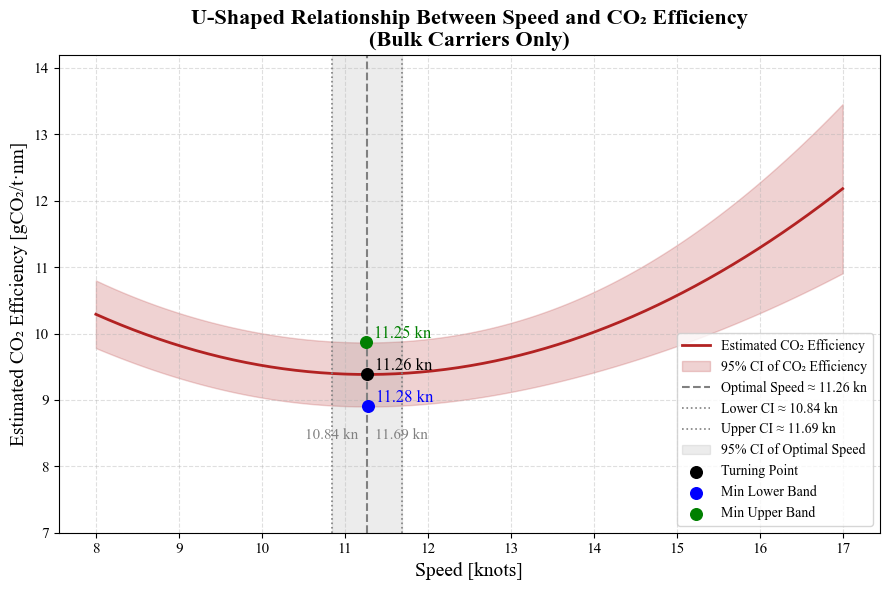

✅ Bulk carrier figure saved successfully to: C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures\bulk_speed_curves.svg


In [41]:
#--- BULK CARRIERS ONLY: SPEED² & PLOT WITH MEAN SHIFT ---#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from linearmodels.panel import RandomEffects
from scipy.stats import chi2
import matplotlib as mpl
import os

# === 1. Prepare bulk carrier panel ===
bulk_df = panel_df[panel_df["Ship type"] == "Bulk carrier"].copy()
bulk_df.columns = (
    bulk_df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace(r"\.", "", regex=True)
)
df_cre = bulk_df.set_index(['IMO_Number', 'Reporting_Period']).copy()

# === 2. Mundlak means for time-varying vars ===
time_varying = ['Speed', 'Age']
means = df_cre.groupby(level=0)[time_varying].transform('mean').add_suffix('_mean')
df_cre = df_cre.join(means)

# === 3. Center speed and create squared term ===
mean_speed = df_cre['Speed'].mean()
df_cre['Speed_c'] = df_cre['Speed'] - mean_speed
df_cre['Speed_c_sq'] = df_cre['Speed_c'] ** 2

# Add between-vessel averages (Mundlak)
df_cre['Speed_c_mean'] = df_cre.groupby(level=0)['Speed_c'].transform('mean')
df_cre['Speed_c_sq_mean'] = df_cre.groupby(level=0)['Speed_c_sq'].transform('mean')

# === 4. Year dummies ===
years = df_cre.index.get_level_values('Reporting_Period')
year_dummies = pd.get_dummies(years, prefix="year", drop_first=True)
year_dummies.index = df_cre.index
df_cre = df_cre.join(year_dummies)
year_terms = " + ".join(year_dummies.columns)

# === 5. Size category dummies (baseline: Capesize) ===
cat_dummies = pd.get_dummies(df_cre['Category'], drop_first=True)
cat_dummies.columns = (
    cat_dummies.columns
    .str.strip()
    .str.replace(r'\s+', '_', regex=True)
    .str.replace(r'\W+', '', regex=True)
)
cat_dummies.index = df_cre.index
df_cre = df_cre.join(cat_dummies)
cat_terms = " + ".join(cat_dummies.columns)

# === 6. Interactions: Category × Year ===
interaction_terms = []
for cat in cat_dummies.columns:
    for year in year_dummies.columns:
        inter_name = f"{cat}_x_{year}"
        df_cre[inter_name] = df_cre[cat] * df_cre[year]
        interaction_terms.append(inter_name)
interaction_str = " + ".join(interaction_terms)

# === 7. Build and fit CRE model ===
formula = (
    "CO2_Eff ~ 1 + "
    "Speed_c + Speed_c_sq + Age "
    "+ Speed_c_mean + Speed_c_sq_mean + Age_mean "
    "+ TEI + DWT "
    f"+ {year_terms} + {cat_terms} + {interaction_str}"
)
cre_model = RandomEffects.from_formula(formula, data=df_cre)
cre_res = cre_model.fit(cov_type="clustered", cluster_entity=True)
print(cre_res.summary)

# === 8. Compute turning point and its 95% CI ===
b1 = cre_res.params['Speed_c']
b2 = cre_res.params['Speed_c_sq']
cov_b1b2 = cre_res.cov.loc['Speed_c', 'Speed_c_sq']
var_b1 = cre_res.cov.loc['Speed_c', 'Speed_c']
var_b2 = cre_res.cov.loc['Speed_c_sq', 'Speed_c_sq']

speed_star = -b1 / (2 * b2) + mean_speed

d_b1 = -1 / (2 * b2)
d_b2 = b1 / (2 * (b2 ** 2))
var_speed_star = (d_b1 ** 2) * var_b1 + (d_b2 ** 2) * var_b2 + 2 * d_b1 * d_b2 * cov_b1b2
se_speed_star = np.sqrt(var_speed_star)

ci_lower = float(speed_star - 1.96 * se_speed_star)
ci_upper = float(speed_star + 1.96 * se_speed_star)

print(f"Turning point: {speed_star:.2f} kn")
print(f"95% CI for turning point: [{ci_lower:.2f}, {ci_upper:.2f}] kn")

# === 8.1 Compute mean shift (C) ===

# 1) Continuous controls mean contribution
controls = ['Age', 'Speed_c_mean', 'Speed_c_sq_mean', 'Age_mean', 'TEI', 'DWT']
C_controls = sum(cre_res.params[v] * df_cre[v].mean() for v in controls if v in cre_res.params.index)

# 2) Mean of year effects
year_coef_names = [c for c in cre_res.params.index if c.startswith('year_')]
C_year = float(np.mean(cre_res.params[year_coef_names])) if year_coef_names else 0.0

# 3) Mean of size category effects
cat_coef_names = [c for c in cat_dummies.columns if c in cre_res.params.index]
C_cat = float(np.mean(cre_res.params[cat_coef_names])) if cat_coef_names else 0.0

# ✅ Total shift (excluding interactions)
C = C_controls + C_year + C_cat

# === 9. Build prediction curve and confidence bands ===
speeds = np.linspace(8, 17, 300)
sc = speeds - mean_speed

mu = (cre_res.params['Intercept'] +
      cre_res.params['Speed_c'] * sc +
      cre_res.params['Speed_c_sq'] * sc**2 + C)

cov = cre_res.cov.loc[['Intercept', 'Speed_c', 'Speed_c_sq'],
                      ['Intercept', 'Speed_c', 'Speed_c_sq']].values
X = np.vstack([np.ones_like(sc), sc, sc**2]).T
se = np.sqrt(np.sum(X @ cov * X, axis=1))

upper = mu + 1.96 * se
lower = mu - 1.96 * se

idx_lo = np.argmin(lower)
idx_hi = np.argmin(upper)
x_lo, x_hi = speeds[idx_lo], speeds[idx_hi]
print(f"Argmin of lower band: {x_lo:.2f} kn")
print(f"Argmin of upper band: {x_hi:.2f} kn")

# === 10. Plot results ===
mpl.rcParams['font.family'] = 'Times New Roman'
fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(speeds, mu, color="firebrick", linewidth=2, label="Estimated CO₂ Efficiency")
ax.fill_between(speeds, lower, upper, color="firebrick", alpha=0.2, label="95% CI of CO₂ Efficiency")

ax.axvline(speed_star, color="gray", linestyle="--", linewidth=1.5, label=f"Optimal Speed ≈ {speed_star:.2f} kn")
ax.axvline(ci_lower, color="gray", linestyle=":", linewidth=1.2, label=f"Lower CI ≈ {ci_lower:.2f} kn")
ax.axvline(ci_upper, color="gray", linestyle=":", linewidth=1.2, label=f"Upper CI ≈ {ci_upper:.2f} kn")
ax.axvspan(ci_lower, ci_upper, color="gray", alpha=0.15, label="95% CI of Optimal Speed")

# Annotate turning point (with C)
eff_star = (cre_res.params['Intercept'] +
            cre_res.params['Speed_c'] * (speed_star - mean_speed) +
            cre_res.params['Speed_c_sq'] * (speed_star - mean_speed)**2 + C)
ax.scatter(speed_star, eff_star, color="black", s=70, zorder=5, label="Turning Point")
ax.text(speed_star + 0.1, eff_star, f"{speed_star:.2f} kn", fontsize=12, va="bottom")

# Show minima of upper and lower bands
eff_lo = lower[idx_lo]
eff_hi = upper[idx_hi]
ax.scatter(x_lo, eff_lo, color="blue", s=70, zorder=5, marker='o', label="Min Lower Band")
ax.scatter(x_hi, eff_hi, color="green", s=70, zorder=5, marker='o', label="Min Upper Band")
ax.text(x_lo + 0.1, eff_lo, f"{x_lo:.2f} kn", fontsize=12, color="blue", va="bottom")
ax.text(x_hi + 0.1, eff_hi, f"{x_hi:.2f} kn", fontsize=12, color="green", va="bottom")

# Annotate CI bounds
y_min_for_text = ax.get_ylim()[0] - 0.1
ax.text(ci_lower, y_min_for_text, f"{ci_lower:.2f} kn", fontsize=11, ha="center", va="top", color="gray")
ax.text(ci_upper, y_min_for_text, f"{ci_upper:.2f} kn", fontsize=11, ha="center", va="top", color="gray")

# === ✅ Aesthetics ===
ax.set_xticks(np.arange(8, 18, 1))
ax.set_xlabel("Speed [knots]", fontsize=14)
ax.set_ylabel("Estimated CO₂ Efficiency [gCO₂/t·nm]", fontsize=14)
ax.set_title("U-Shaped Relationship Between Speed and CO₂ Efficiency\n(Bulk Carriers Only)", fontsize=16, fontweight="bold")

# ✅ Set Y-axis to start at 7 and go by 1
ax.set_yticks(np.arange(7, np.ceil(np.max(upper)) + 1, 1))
ax.set_ylim(7, np.ceil(np.max(upper)) + 0.2)

ax.grid(True, linestyle="--", alpha=0.4)
ax.legend(loc='lower right', fontsize=10, frameon=True)

plt.tight_layout()

# === Save figure ===
save_path = r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures\bulk_speed_curves.svg"
plt.savefig(save_path, format="svg", bbox_inches="tight")
plt.show()

print(f"✅ Bulk carrier figure saved successfully to: {save_path}")

In [ ]:
# export results
table = export_cre_results(cre_res, "Bulk_Model_Speed", save_dir)

In [ ]:
# --- Dual Plot: Elasticity + Natural Scale for TEI (Bulk Carriers Only) --- #

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from linearmodels.panel import RandomEffects
from scipy.stats import chi2

# === 1. Filter to Bulk Carriers Only ===
df = panel_df.copy()
df.columns = (
    df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace(r"\.", "", regex=True)
)
df = df[df["Ship_type"] == "Bulk carrier"].copy()
df_cre = df.set_index(['IMO_Number', 'Reporting_Period']).copy()

# === 2. Log-transform variables ===
df_cre['log_CO2_Eff'] = np.log(df_cre['CO2_Eff'])
df_cre['log_Speed'] = np.log(df_cre['Speed'])
df_cre['log_TEI'] = np.log(df_cre['TEI'])
df_cre['log_DWT'] = np.log(df_cre['DWT'])

# === 3. Mundlak means ===
time_varying_log = ['log_Speed', 'Age']
means_log = df_cre.groupby(level=0)[time_varying_log].transform('mean').add_suffix('_mean')
df_cre = df_cre.join(means_log)

# === 4. Quadratic term ===
df_cre['log_TEI_sq'] = df_cre['log_TEI'] ** 2

# === 5. Year dummies ===
years = df_cre.index.get_level_values('Reporting_Period')
year_dummies = pd.get_dummies(years, prefix="year", drop_first=True)
year_dummies.index = df_cre.index
df_cre = df_cre.join(year_dummies)
year_terms = " + ".join(year_dummies.columns)

# === 6. Category dummies ===
cat_dummies = pd.get_dummies(df_cre['Category'], drop_first=True)
cat_dummies.columns = (
    cat_dummies.columns
    .str.strip()
    .str.replace(r'\s+', '_', regex=True)
    .str.replace(r'\W+', '', regex=True)
)
cat_dummies.index = df_cre.index
df_cre = df_cre.join(cat_dummies)
cat_terms = " + ".join(cat_dummies.columns)

# === 7. Interaction terms: Category × Year ===
interaction_terms = []
for cat in cat_dummies.columns:
    for year in year_dummies.columns:
        inter_name = f"{cat}_x_{year}"
        df_cre[inter_name] = df_cre[cat] * df_cre[year]
        interaction_terms.append(inter_name)
interaction_str = " + ".join(interaction_terms)

# === 8. Fit CRE model with interactions ===
formula_nl = (
    "log_CO2_Eff ~ 1 + "
    "log_Speed + Age + log_TEI + log_TEI_sq + log_DWT "
    "+ log_Speed_mean + Age_mean "
    f"+ {year_terms} + {cat_terms} + {interaction_str}"
)
cre_model_nl = RandomEffects.from_formula(formula_nl, data=df_cre)
cre_res_nl = cre_model_nl.fit(cov_type="clustered", cluster_entity=True)
print(cre_res_nl.summary)

# === 9. Extract coefficients ===
b0 = cre_res_nl.params['Intercept']
b1 = cre_res_nl.params['log_TEI']
b2 = cre_res_nl.params['log_TEI_sq']

# === 10. TEI Range ===
log_tei_range = np.linspace(df_cre['log_TEI'].quantile(0.05), df_cre['log_TEI'].quantile(0.95), 200)
tei_range = np.exp(log_tei_range)

# === 11. Elasticity ===
elasticity = b1 + 2 * b2 * log_tei_range

var_b1 = cre_res_nl.cov.loc['log_TEI', 'log_TEI']
var_b2 = cre_res_nl.cov.loc['log_TEI_sq', 'log_TEI_sq']
cov_b1b2 = cre_res_nl.cov.loc['log_TEI', 'log_TEI_sq']

se_elasticity = np.sqrt(
    var_b1 + (2 * log_tei_range) ** 2 * var_b2 + 2 * (2 * log_tei_range) * cov_b1b2
)
upper_el = elasticity + 1.96 * se_elasticity
lower_el = elasticity - 1.96 * se_elasticity

# === 12. Predicted CO₂ Efficiency (controlling for other vars) ===
X_means = {
    'log_Speed': df_cre['log_Speed'].mean(),
    'Age': df_cre['Age'].mean(),
    'log_DWT': df_cre['log_DWT'].mean(),
    'log_Speed_mean': df_cre['log_Speed_mean'].mean(),
    'Age_mean': df_cre['Age_mean'].mean()
}

log_pred = (
    b0
    + b1 * log_tei_range
    + b2 * log_tei_range**2
    + cre_res_nl.params['log_Speed'] * X_means['log_Speed']
    + cre_res_nl.params['Age'] * X_means['Age']
    + cre_res_nl.params['log_DWT'] * X_means['log_DWT']
    + cre_res_nl.params['log_Speed_mean'] * X_means['log_Speed_mean']
    + cre_res_nl.params['Age_mean'] * X_means['Age_mean']
)

# === Add mean year, category, and interaction effects ===
for col in year_dummies.columns:
    if col in cre_res_nl.params.index:
        log_pred += cre_res_nl.params[col] * df_cre[col].mean()

for col in cat_dummies.columns:
    if col in cre_res_nl.params.index:
        log_pred += cre_res_nl.params[col] * df_cre[col].mean()

for col in interaction_terms:
    if col in cre_res_nl.params.index:
        log_pred += cre_res_nl.params[col] * df_cre[col].mean()

predicted_eff = np.exp(log_pred)

# === 13. Plot both ===
mpl.rcParams['font.family'] = 'Times New Roman'
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- (A) Elasticity Plot ---
axes[0].plot(log_tei_range, elasticity, color="firebrick", linewidth=2, label="Elasticity")
axes[0].fill_between(log_tei_range, lower_el, upper_el, color="firebrick", alpha=0.2, label="95% CI")
axes[0].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[0].set_xlabel("log(TEI)", fontsize=14)
axes[0].set_ylabel("Marginal Elasticity of CO₂ Efficiency", fontsize=14)
axes[0].set_title("(A) Elasticity Curve (log–log model)", fontsize=15, fontweight="bold")
axes[0].grid(True, linestyle="--", alpha=0.4)
axes[0].legend(fontsize=11, loc='best')

# --- (B) Natural Scale Plot ---
axes[1].plot(tei_range, predicted_eff, color="navy", linewidth=2, label="Predicted CO₂ Efficiency")
axes[1].set_xlabel("TEI", fontsize=14)
axes[1].set_ylabel("Predicted CO₂ Efficiency [gCO₂/t·nm]", fontsize=14)
axes[1].set_title("(B) Predicted CO₂ Efficiency vs. TEI (Natural Scale)", fontsize=15, fontweight="bold")
axes[1].grid(True, linestyle="--", alpha=0.4)
axes[1].legend(fontsize=11, loc='best')

plt.suptitle(
    "Elasticity vs. Natural Relationship of TEI and CO₂ Efficiency (Bulk Carriers)",
    fontsize=19,
    fontweight="bold",
    y=0.95  # ↓ Moves the title closer to the subplots (default is ≈ 0.98–0.99)
)
plt.tight_layout(rect=[0, 0, 0.94, 0.96])

# === Save ===
save_path = r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures\tei_elasticity_vs_levels_bulk.svg"
plt.savefig(save_path, format="svg", bbox_inches="tight")
plt.show()

print(f"✅ Figure saved successfully to: {save_path}")

In [ ]:
# export results
table = export_cre_results(cre_res_nl, "Bulk_Model_Log", save_dir)

In [ ]:
# --- VIF Diagnostics for Panel Model --- #

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1️⃣ Build the design matrix (X) from the same df_cre used in your regression
X = df_cre.copy().drop(columns=["CO2_Eff"], errors="ignore")

# Only keep numeric variables
X = X.select_dtypes(include=[np.number]).fillna(0)

# Add constant (intercept) for VIF calculation
X = sm.add_constant(X)

# 2️⃣ Compute VIF for all variables
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 3️⃣ Identify continuous vs. dummy variables
continuous_vars = ["Speed", "Age", "Speed_mean", "Age_mean", "TEI", "DWT"]  # edit if needed

def classify_var(name):
    if name in continuous_vars:
        return "Continuous"
    elif name == "const":
        return "Constant"
    else:
        return "Dummy/Interaction"

vif_data["Type"] = vif_data["feature"].apply(classify_var)

# 4️⃣ Sort by VIF and show top 10
vif_top10 = vif_data.sort_values("VIF", ascending=False).head(10)

print("\n📊 Top 10 Variables by VIF:\n")
print(vif_top10.to_string(index=False))

# Optional: export full VIF table
vif_data_sorted = vif_data.sort_values("VIF", ascending=False)
vif_data_sorted.to_csv("vif_results.csv", index=False)
print("\n✅ Full VIF table saved as 'vif_results.csv'")

In [ ]:
# --- Plotting Interactions for Bulk Carrier Size Categories (Mini Bulk Excluded) ---#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# === Folder to save ===
fig_dir = r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures"

# ----- Inputs from your fitted model -----
params = cre_res.params
cov    = cre_res.cov

# ===== COMMON SETUP =====
year_cols = [c for c in params.index if c.startswith("year_")]
years = [2018] + sorted(int(c.split("_")[1]) for c in year_cols)

# ✅ Colormap (from your legend, Mini Bulk excluded)
color_map = {
    "Handysize": "#ff7f0e",          # orange
    "Handymax": "#2ca02c",           # green
    "Supramax": "#d62728",           # red
    "Panamax": "#9467bd",            # purple
    "Capesize": "#8c564b"            # brown (baseline)
}

# Mapping for display names
sanitized_to_display = {
    "Handysize": "Handysize",
    "Handymax": "Handymax",
    "Supramax": "Supramax",
    "Panamax": "Panamax",
    "Capesize": "Capesize"
}

# ✅ Order categories (Mini Bulk removed)
panel_order = ["Capesize", "Handysize", "Handymax", "Supramax", "Panamax"]

# ----- Helper: linear combination -----
def lincomb(varnames):
    a = np.zeros(len(params))
    any_hit = False
    for v in varnames:
        if v in params.index:
            a[params.index.get_loc(v)] += 1.0
            any_hit = True
    est = float(a @ params.values) if any_hit else 0.0
    se  = float(np.sqrt(a @ cov.values @ a)) if any_hit else 0.0
    return est, se

# =========================================================
# FIGURE 1: Within-category change relative to own 2018 baseline
# =========================================================
def build_series_for_category(cat):
    rows = []
    for y in years:
        if cat == "Capesize":
            est, se = (0.0, 0.0) if y == 2018 else lincomb([f"year_{y}"])
        else:
            if y == 2018:
                est, se = 0.0, 0.0
            else:
                terms = [f"year_{y}"]
                inter = f"{cat}_x_year_{y}"
                if inter in params.index:
                    terms.append(inter)
                est, se = lincomb(terms)
        rows.append({"Year": y, "Estimate": est, "SE": se})
    df = pd.DataFrame(rows)
    df["lo"] = df["Estimate"] - 1.96 * df["SE"]
    df["hi"] = df["Estimate"] + 1.96 * df["SE"]
    return df

# Create 3×2 or 3×1 grid (we have 5 categories)
fig, axes = plt.subplots(3, 2, figsize=(10, 10), sharey=True)
axes = axes.ravel()

for ax, cat in zip(axes, panel_order):
    dfp = build_series_for_category(cat)
    display_name = sanitized_to_display.get(cat, cat)
    ax.plot(dfp["Year"], dfp["Estimate"], marker="o", color=color_map[cat], label=display_name)
    ax.fill_between(dfp["Year"], dfp["lo"], dfp["hi"], alpha=0.20, linewidth=0, color=color_map[cat])
    ax.axhline(0, linestyle="--", linewidth=1, color="k")
    ax.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.4)
    ax.set_title(display_name, fontsize=13, fontweight="normal")
    ax.set_xlabel("Year", fontsize=11)

# Remove any unused subplot if fewer than 6
for ax in axes[len(panel_order):]:
    ax.axis("off")

axes[0].set_ylabel("Units of CO₂ Eff.", fontsize=11)
axes[2].set_ylabel("Units of CO₂ Eff.", fontsize=11)
axes[4].set_ylabel("Units of CO₂ Eff.", fontsize=11)
fig.suptitle("Change Relative to Each Size Category's Own 2018 Baseline", fontsize=16, fontweight="bold")
plt.tight_layout()

save_path = os.path.join(fig_dir, "bulk_size_interactions_Fig1.svg")
plt.savefig(save_path, format="svg", bbox_inches="tight")
plt.show()

# =========================================================
# FIGURE 2: Cross-category gap vs Capesize (same year)
# =========================================================

# Build Δ_{c,t} = φ_c + ψ_{c,t}
rows = []
for cat in [c for c in panel_order if c != "Capesize"]:
    for y in years:
        terms = [cat]  # φ_c
        inter = f"{cat}_x_year_{y}"
        if y != 2018 and inter in params.index:
            terms.append(inter)
        est, se = lincomb(terms)
        rows.append({
            "CategorySan": cat,
            "CategoryDisp": sanitized_to_display.get(cat, cat),
            "Year": y,
            "Estimate": est,
            "SE": se,
            "lo": est - 1.96 * se,
            "hi": est + 1.96 * se
        })

df_gap = pd.DataFrame(rows)

fig, ax = plt.subplots(figsize=(9, 6))

for cat in [c for c in panel_order if c != "Capesize"]:
    display_name = sanitized_to_display[cat]
    g = df_gap[df_gap["CategorySan"] == cat].sort_values("Year")
    ax.plot(g["Year"], g["Estimate"], marker="o", label=display_name, color=color_map[cat])
    ax.fill_between(g["Year"], g["lo"], g["hi"], alpha=0.20, linewidth=0, color=color_map[cat])

# Add zero reference (Capesize)
ax.plot(years, [0]*len(years), linestyle=":", linewidth=2, color=color_map["Capesize"], label="Capesize")

ax.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.4)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Units of CO₂ Eff.", fontsize=12)
ax.set_title("Gap vs Capesize of Same Year", fontsize=16, fontweight="bold")

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, ncol=2, fontsize=11)

save_path = os.path.join(fig_dir, "bulk_size_interactions_Fig2.svg")
plt.savefig(save_path, format="svg", bbox_inches="tight")
plt.tight_layout()
plt.show()

# Plotings for Panels

In [ ]:
# Time Trends (all types) + Vessel Counts
#  - consistent palette
#  - legend title fully inside exported SVG
# ============================================

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
import pandas as pd

# -----------------------------
# Global font setup
# -----------------------------
mpl.rcParams["font.family"] = "Times New Roman"

# -----------------------------
# Clean column names once
# -----------------------------
panel_df.columns = (
    panel_df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace(r"\.", "", regex=True)
)

# Ensure Reporting_Period is numeric (int)
panel_df["Reporting_Period"] = panel_df["Reporting_Period"].astype(int)

# -----------------------------
# 1) Compute mean and std per year × ship type
# -----------------------------
agg_vars = ["CO2_Eff", "TEI", "Speed", "DWT", "Age"]

summary = (
    panel_df
    .groupby(["Reporting_Period", "Ship_type"])[agg_vars]
    .agg(["mean", "std"])
    .reset_index()
)

# Flatten MultiIndex columns
summary.columns = [f"{var}_{stat}" if stat else var
                   for var, stat in summary.columns.to_flat_index()]

# -----------------------------
# Fixed colors for ship types (your palette)
# -----------------------------
color_map = {
    "Bulk carrier": "steelblue",
    "Oil tanker": "firebrick",
    "Chemical tanker": "seagreen",
    "Container ship": "darkorange"
}

# -----------------------------
# 2) Helper: plot mean ± std
# -----------------------------
def plot_with_cv_errorbars(ax, data, variable, ylabel, title, show_xlabel=False):
    handles, labels = [], []
    for ship in data["Ship_type"].unique():
        subset = data[data["Ship_type"] == ship].sort_values("Reporting_Period")
        mean = subset[f"{variable}_mean"]
        std  = subset[f"{variable}_std"]
        color = color_map.get(ship, None)

        eb = ax.errorbar(
            subset["Reporting_Period"], mean,
            yerr=std,
            fmt="o-", markersize=5, capsize=2,
            elinewidth=0.8, alpha=0.85, label=ship,
            color=color
        )
        # Legend handle with consistent style
        handles.append(mlines.Line2D([], [], color=eb[0].get_color(),
                                     marker='o', linestyle='-'))
        labels.append(ship)

    ax.set_title(title, fontweight="bold")
    ax.set_ylabel(ylabel)
    ax.set_xticks(sorted(data["Reporting_Period"].unique()))
    if show_xlabel:
        ax.set_xlabel("Reporting Period")
    ax.grid(True, linestyle="--", alpha=0.6)
    return handles, labels

# -----------------------------
# 3) Build subplot grid (3×2)
# -----------------------------
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=True)

all_handles, all_labels = [], []

# Row 1
h, l = plot_with_cv_errorbars(
    axes[0, 0], summary, "CO2_Eff",
    "CO₂ Eff (mean ± sd)", "Average CO₂ Efficiency per Year by Ship Type"
)
all_handles, all_labels = h, l

plot_with_cv_errorbars(
    axes[0, 1], summary, "TEI",
    "TEI (mean ± sd)", "Average TEI per Year by Ship Type"
)

# Row 2
plot_with_cv_errorbars(
    axes[1, 0], summary, "Speed",
    "Speed (mean ± sd)", "Average Speed per Year by Ship Type"
)

plot_with_cv_errorbars(
    axes[1, 1], summary, "DWT",
    "DWT (mean ± sd)", "Average DWT per Year by Ship Type"
)

# Row 3
plot_with_cv_errorbars(
    axes[2, 0], summary, "Age",
    "Age (mean ± sd)", "Average Age per Year by Ship Type",
    show_xlabel=True
)

# -----------------------------
# 4) Vessel counts per year per ship type (bottom-right panel)
# -----------------------------
vessel_counts_trend = (
    panel_df.groupby(["Reporting_Period", "Ship_type"])["IMO_Number"]
    .nunique()
    .reset_index(name="Vessel_Count")
)

for ship in vessel_counts_trend["Ship_type"].unique():
    subset = vessel_counts_trend[vessel_counts_trend["Ship_type"] == ship] \
             .sort_values("Reporting_Period")
    axes[2, 1].plot(
        subset["Reporting_Period"], subset["Vessel_Count"],
        marker="o", label=ship, color=color_map.get(ship, None)
    )

axes[2, 1].set_title("Number of Vessels per Year by Ship Type", fontweight="bold")
axes[2, 1].set_ylabel("Vessels")
axes[2, 1].set_xlabel("Reporting Period")
axes[2, 1].set_xticks(sorted(vessel_counts_trend["Reporting_Period"].unique()))
axes[2, 1].grid(True, linestyle="--", alpha=0.6)

# -----------------------------
# 5) Figure-level legend (kept INSIDE the canvas)
# -----------------------------
fig.legend(
    all_handles, all_labels,
    title="Ship Type", title_fontsize=15, fontsize=13,
    loc="upper center", ncol=4, frameon=True,
    bbox_to_anchor=(0.5, 0.98),   # inside the figure
    borderaxespad=0.2
)
plt.setp(fig.legends[0].get_title(), fontweight="bold")

# -----------------------------
# Final adjustments + SAVE
# -----------------------------
plt.tight_layout(rect=[0, 0, 1, 0.93])  # leave space at top for legend
plt.savefig(
    r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures\CO2_and_TEI_All_Types.svg",
    format="svg", dpi=300
)
plt.show()

# =========================================================
# SEPARATE FIGURE: Vessel counts (standalone)
# =========================================================
fig, ax = plt.subplots(figsize=(7, 5))

for ship in vessel_counts_trend["Ship_type"].unique():
    subset = vessel_counts_trend[vessel_counts_trend["Ship_type"] == ship] \
             .sort_values("Reporting_Period")
    ax.plot(
        subset["Reporting_Period"],
        subset["Vessel_Count"],
        marker="o", label=ship,
        color=color_map.get(ship, None)
    )

ax.set_title("Number of Vessels per Year by Ship Type", fontweight="bold")
ax.set_xlabel("Reporting Period")
ax.set_ylabel("Number of Vessels")
ax.set_xticks(sorted(vessel_counts_trend["Reporting_Period"].unique()))
ax.grid(True, linestyle="--", alpha=0.6)

# Legend INSIDE; export covers it fully
leg = ax.legend(title="Ship Type", title_fontsize=11, fontsize=9, frameon=True, loc="upper left")
plt.setp(leg.get_title(), fontweight="bold")

plt.tight_layout()
plt.savefig(
    r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures\Vessel_Counts_All_Types.svg",
    format="svg", dpi=300
)
plt.show()

In [ ]:
# --- Wald test for statistical significance of interaction terms ---#

from scipy.stats import chi2
import numpy as np

# 1) collect all interaction parameters
inter_vars = [p for p in cre_res.params.index if "_x_year_" in p]
if not inter_vars:
    print("No interaction terms found in the model.")
else:
    # 2) pull betas and (cluster-robust) covariance, aligned
    beta = cre_res.params.reindex(inter_vars).values
    V = cre_res.cov.reindex(index=inter_vars, columns=inter_vars).values

    # 3) Wald statistic (use pinv for numerical stability)
    wald = float(beta.T @ np.linalg.pinv(V) @ beta)
    df = len(inter_vars)
    pval = chi2.sf(wald, df)

    print(f"Interaction block Wald χ² = {wald:.3f} (df={df}), p = {pval:.4g}")

In [ ]:
# ----- Trend with Median All types--------#

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines

# -----------------------------
# Global font setup
# -----------------------------
mpl.rcParams["font.family"] = "Times New Roman"

# -----------------------------
# 1) Compute mean, std, median
# -----------------------------
stats_data = (
    df.groupby(["Reporting_Period", "Ship_type"])
      [["CO2_Eff", "TEI", "Speed", "DWT", "Age"]]
      .agg(['mean','std','median'])
      .reset_index()
)

# Flatten column names
stats_data.columns = ['Reporting_Period','Ship_type'] + [
    f"{col}_{stat}" for col, stat in stats_data.columns[2:]
]

# Ensure Reporting_Period is numeric
stats_data["Reporting_Period"] = stats_data["Reporting_Period"].astype(int)

# -----------------------------
# 2) Helper: plot mean ± std + median
# -----------------------------
def plot_with_mean_std_median(ax, data, variable, ylabel, title, show_xlabel=False):
    handles, labels = [], []
    for ship in data["Ship_type"].unique():
        subset = data[data["Ship_type"] == ship]
        mean = subset[f"{variable}_mean"]
        std = subset[f"{variable}_std"]
        median = subset[f"{variable}_median"]

        # Mean ± std with error bars
        eb = ax.errorbar(
            subset["Reporting_Period"], mean,
            yerr=std,
            fmt="o-", markersize=5, capsize=2,
            elinewidth=0.8, alpha=0.7, label=f"{ship} (mean)"
        )

        # Median line
        ax.plot(subset["Reporting_Period"], median,
                linestyle="--", marker="+", alpha=0.8,
                color=eb[0].get_color(), label=f"{ship} (median)")

        # Legend handles
        handles.extend([
            mlines.Line2D([], [], color=eb[0].get_color(), marker='o',
                          linestyle='-', label=f"{ship} (mean)"),
            mlines.Line2D([], [], color=eb[0].get_color(), marker='+',
                          linestyle='--', label=f"{ship} (median)")
        ])
        labels.extend([f"{ship} (mean)", f"{ship} (median)"])

    ax.set_title(title, fontweight="bold")
    ax.set_ylabel(ylabel)
    ax.set_xticks(sorted(data["Reporting_Period"].unique()))
    if show_xlabel:
        ax.set_xlabel("Year")
    ax.grid(True, linestyle="--", alpha=0.6)

    return handles, labels

# -----------------------------
# 3) Build subplot grid
# -----------------------------
fig, axes = plt.subplots(3, 2, figsize=(14,12), sharex=True)

all_handles, all_labels = [], []

h, l = plot_with_mean_std_median(
    axes[0,0], stats_data, "CO2_Eff",
    "CO₂ Eff (± STD + Median)", "Average CO₂ Efficiency per Year by Ship Type"
)
all_handles, all_labels = h, l

plot_with_mean_std_median(
    axes[0,1], stats_data, "TEI",
    "TEI (± STD + Median)", "Average TEI per Year by Ship Type"
)

plot_with_mean_std_median(
    axes[1,0], stats_data, "Speed",
    "Speed (± STD + Median)", "Average Speed per Year by Ship Type"
)

plot_with_mean_std_median(
    axes[1,1], stats_data, "DWT",
    "DWT (± STD + Median)", "Average DWT per Year by Ship Type"
)

plot_with_mean_std_median(
    axes[2,0], stats_data, "Age",
    "Age (± STD + Median)", "Average Age per Year by Ship Type",
    show_xlabel=True
)

# -----------------------------
# 4) Vessel counts per year per ship type
# -----------------------------
vessel_counts_trend = (
    df.groupby(["Reporting_Period","Ship_type"])["IMO_Number"]
      .nunique()
      .reset_index(name="Vessel_Count")
)

for ship in vessel_counts_trend["Ship_type"].unique():
    subset = vessel_counts_trend[vessel_counts_trend["Ship_type"] == ship]
    axes[2,1].plot(subset["Reporting_Period"], subset["Vessel_Count"],
                   marker="o", label=ship)

axes[2,1].set_title("Number of Vessels per Year by Ship Type", fontweight="bold")
axes[2,1].set_ylabel("Count")
axes[2,1].set_xlabel("Year")
axes[2,1].set_xticks(sorted(vessel_counts_trend["Reporting_Period"].unique()))
axes[2,1].grid(True, linestyle="--", alpha=0.6)

# -----------------------------
# 5) Legend with both mean + median
# -----------------------------
fig.legend(all_handles, all_labels,
           title="Ship Type", title_fontsize=12, fontsize=9,
           loc="upper center", ncol=4, frameon=True, bbox_to_anchor=(0.5, 1.02))

plt.setp(fig.legends[0].get_title(), fontweight="bold")

# -----------------------------
# 6) Save + show
# -----------------------------
plt.tight_layout(rect=[0,0,1,0.97])  # leave space for legend
plt.savefig(r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures\CO2_and_TEI_All_Types_and_Median.svg",
            format="svg", dpi=300)
plt.show()


In [ ]:
# ----- DISTRIBUTIONS -----#

import matplotlib.pyplot as plt
import seaborn as sns
import os

# === Style setup ===
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

# === Colors per ship type ===
color_map = {
    "Bulk carrier": "steelblue",
    "Oil tanker": "firebrick",
    "Chemical tanker": "seagreen",
    "Container ship": "darkorange"
}

ship_order = ["Bulk carrier", "Oil tanker", "Chemical tanker", "Container ship"]

# === Folder to save ===
fig_dir = r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures"

# ==========================================================
# === 1️⃣ INDEPENDENT VARIABLES (2×2): TEI, Speed, Age, DWT ===
# ==========================================================
plot_vars = [
    ("TEI", "TEI [gCO₂ / t·nm]", "Technical Efficiency Index"),
    ("Speed", "Speed [knots]", "Speed"),
    ("Age", "Age [years]", "Age"),
    ("DWT", "DWT [t]", "Carrying Capacity")
]

fig, axes = plt.subplots(2, 2, figsize=(13, 9))
# 🔹 Bring suptitle closer using the y argument
fig.suptitle("Distributions of Independent Variables", fontsize=18, fontweight="bold", y=0.93)
axes = axes.flatten()

for ax, (var, xlabel, title) in zip(axes, plot_vars):
    for ship in ship_order:
        if ship not in panel_df["Ship_type"].unique():
            continue
        subset = panel_df[panel_df["Ship_type"] == ship]
        sns.kdeplot(
            subset[var],
            fill=True, alpha=0.25, linewidth=1.3,
            color=color_map.get(ship, "gray"),
            ax=ax, label=ship
        )

    ax.set_title(title)
    ax.set_xlabel(xlabel, labelpad=3)   # bring x-label closer
    ax.set_ylabel("Density", labelpad=3)  # bring y-label closer
    ax.grid(True, linestyle="--", alpha=0.6)

    # === Bold legend title ===
    leg = ax.legend(title="Ship Type", title_fontsize=10, fontsize=9, frameon=True)
    plt.setp(leg.get_title(), fontweight="bold")

# Adjust spacing for a cleaner layout
plt.tight_layout(rect=[0, 0, 1, 0.93], h_pad=2, w_pad=2)
indep_path = os.path.join(fig_dir, "Distributions_Independent_Variables.svg")
plt.savefig(indep_path, format="svg", dpi=300)
plt.show()


# ==========================================================
# === 2️⃣ DEPENDENT VARIABLE: CO₂ Efficiency (KDE curves only) ===
# ==========================================================
fig, ax = plt.subplots(figsize=(8, 6))
# 🔹 Bring suptitle closer here too
fig.suptitle("Distributions of Dependent Variable", fontsize=16, fontweight="bold", y=0.92)

for ship in ship_order:
    if ship not in panel_df["Ship_type"].unique():
        continue
    subset = panel_df[panel_df["Ship_type"] == ship]
    sns.kdeplot(
        subset["CO2_Eff"],
        fill=True, alpha=0.25, linewidth=1.3,
        color=color_map.get(ship, "gray"),
        ax=ax, label=ship
    )

ax.grid(True, linestyle="--", alpha=0.6)
ax.set_xlabel("CO₂ Efficiency [gCO₂ / t·nm]", labelpad=3)
ax.set_ylabel("Density", labelpad=3)

leg = ax.legend(title="Ship Type", title_fontsize=10, fontsize=9, frameon=True)
plt.setp(leg.get_title(), fontweight="bold")

plt.tight_layout(rect=[0, 0, 1, 0.93])
dep_path = os.path.join(fig_dir, "Distributions_CO2_Efficiency.svg")
plt.savefig(dep_path, format="svg", dpi=300)
plt.show()

In [ ]:
# ----- CO₂ vs Independent Variables (optimized 2×2 subplot) ----- #

import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.lines import Line2D

# === Style setup ===
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

# === Colors per ship type ===
color_map = {
    "Bulk carrier": "steelblue",
    "Oil tanker": "firebrick",
    "Chemical tanker": "seagreen",
    "Container ship": "darkorange"
}

ship_order = ["Bulk carrier", "Oil tanker", "Chemical tanker", "Container ship"]

# === Display names for legend ===
legend_labels = {
    "Bulk carrier": "Bulk C.",
    "Oil tanker": "Oil T.",
    "Chemical tanker": "Chemical T.",
    "Container ship": "Container S."
}

# === Folder to save ===
fig_dir = r"C:\Users\30697\Documents\MSc in ISFM\5th_Bimester_Thesis\Thesis\Figures"

# === Variables to plot (x, xlabel, title) ===
plot_vars = [
    ("TEI", "TEI [gCO₂ / t·nm]", "CO₂ Eff. vs TEI"),
    ("Speed", "Speed [knots]", "CO₂ Eff. vs Speed"),
    ("Age", "Age [years]", "CO₂ Eff. vs Age"),
    ("DWT", "DWT [t]", "CO₂ Eff. vs DWT")
]

# === Create 2×2 subplot ===
fig, axes = plt.subplots(2, 2, figsize=(13, 9))
fig.suptitle("Relationships Between CO₂ Efficiency and Explanatory Variables",
             fontsize=18, fontweight="bold", y=0.95, x=0.5)
axes = axes.flatten()

# === Plot each variable ===
for ax, (x_var, x_label, title) in zip(axes, plot_vars):
    for ship in ship_order:
        if ship not in panel_df["Ship_type"].unique():
            continue
        # Subsample data to 30% for lighter plots
        subset = panel_df[panel_df["Ship_type"] == ship].sample(frac=0.75, random_state=1) #in case there are too many keep a fraction
        
        # Scatter (rasterized for small file size)
        sns.scatterplot(
            data=subset,
            x=x_var, y="CO2_Eff",
            color=color_map[ship], alpha=0.25, s=25, ax=ax,
            rasterized=True  # 🔹 rasterize scatter points
        )

        # Smoothed regression trend (kept vector)
        sns.regplot(
            data=subset,
            x=x_var, y="CO2_Eff",
            scatter=False, ci=None,
            color=color_map[ship], ax=ax
        )

    ax.set_title(title)
    ax.set_xlabel(x_label, labelpad=3)
    ax.set_ylabel("CO₂ Efficiency [gCO₂ / t·nm]", labelpad=3)
    ax.grid(True, linestyle="--", alpha=0.6)

# === Create one common legend (centered on top) ===
legend_elements = [
    Line2D([0], [0], color=color_map[ship], lw=2, label=legend_labels[ship])
    for ship in ship_order
]
leg = fig.legend(
    handles=legend_elements,
    title="Ship Type", title_fontsize=14, fontsize=13,
    loc="upper center", ncol=4,
    bbox_to_anchor=(0.51, 0.0225), frameon=True
)
plt.setp(leg.get_title(), fontweight="bold")

# === Adjust layout and save ===
plt.tight_layout(rect=[0, 0, 1, 0.96], h_pad=2, w_pad=2)

save_path = os.path.join(fig_dir, "CO2_vs_All_Independent_Variables_2.svg")
plt.savefig(save_path, format="svg", bbox_inches="tight")  # ✅ vector + raster mix
plt.show()

print(f"✅ Figure saved successfully at:\n{save_path}")